1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
import sklearn

from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler,MinMaxScaler, StandardScaler ,PowerTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import KernelPCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [2]:
warnings.filterwarnings('ignore')

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [4]:
#read the data

data_path = ''  #the path where you downloaded the data
df = pd.read_csv('CC GENERAL.csv')

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


| Feature                         | Description                                            |
|---------------------------------|--------------------------------------------------------|
| CUST_ID                         | Identification of Credit Card holder (Categorical)     |
| BALANCE                         | Balance amount left in their account to make purchases |
| BALANCE_FREQUENCY               | How frequently the Balance is updated                  |
| PURCHASES                       | Amount of purchases made from account                  |
| ONEOFF_PURCHASES                | Maximum purchase amount done in one-go                 |
| INSTALLMENTS_PURCHASES          | Amount of purchase done in installment                 |
| CASH_ADVANCE                    | Cash in advance given by the user                      |
| PURCHASES_FREQUENCY             | How frequently the Purchases are being made            |
| ONEOFFPURCHASESFREQUENCY        | How frequently Purchases are happening in one-go       |
| PURCHASESINSTALLMENTSFREQUENCY | How frequently purchases in installments are being done|
| CASHADVANCEFREQUENCY            | How frequently the cash in advance being paid          |
| CASHADVANCETRX                  | Number of Transactions made with "Cash in Advanced"    |
| PURCHASES_TRX                   | Number of purchase transactions made                   |
| CREDIT_LIMIT                    | Limit of Credit Card for user                          |
| PAYMENTS                        | Amount of Payment done by user                         |
| MINIMUM_PAYMENTS                | Minimum amount of payments have to be made by user                |
| PRCFULLPAYMENT                  | Percent of full payment paid by user                   |
| TENURE                          | Tenure of credit card service for user                  |


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

In [5]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [7]:
# This will print basic statistics for numerical columns
df.describe()

# There are many skewed data (e.g. balance, purchases, oneoff_purchases..)
# No negative values
# 'CASH_ADVANCE_FREQUENCY' a frequency with max > 1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
# feel free to investigate what you want

In [9]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [10]:
df[df['CASH_ADVANCE_FREQUENCY']>1]['CASH_ADVANCE_FREQUENCY'] # Frequency can't be > 1

681     1.250000
1626    1.166667
2555    1.125000
2608    1.100000
3038    1.500000
3253    1.166667
8055    1.090909
8365    1.142857
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

In [11]:
df['TENURE'].unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

In [12]:
df.dtypes
# The data seems consistent as there is no 'object' datatypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [13]:
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [14]:
df.loc[np.where(df.isnull()==True)[0]]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [15]:
df.duplicated(subset='CUST_ID').sum()

0

In [16]:
df.duplicated().sum()

0

In [17]:
df[df['MINIMUM_PAYMENTS'].isnull()][['PAYMENTS','MINIMUM_PAYMENTS']]

,PAYMENTS,MINIMUM_PAYMENTS
3,0.000000,NaN
45,0.000000,NaN
47,0.000000,NaN
54,417.016763,NaN
55,0.000000,NaN
...,...,...
8919,0.000000,NaN
8929,0.000000,NaN
8935,0.000000,NaN
8944,0.000000,NaN


In [18]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()) & (df['PAYMENTS']==0)][['PAYMENTS','MINIMUM_PAYMENTS']] 
# 240/313 Missing values in the 'MINIMUM_PAYMENTS' column correspond to cases where there are no payments made by the customer
# We replace these missing values with zero only where the 'PAYMENTS' column is also zero,indicating no payment made by the customer

,PAYMENTS,MINIMUM_PAYMENTS
3,0.0,NaN
45,0.0,NaN
47,0.0,NaN
55,0.0,NaN
56,0.0,NaN
...,...,...
8854,0.0,NaN
8919,0.0,NaN
8929,0.0,NaN
8935,0.0,NaN


In [19]:
# all rows with zero payments
L = list(df[df['PAYMENTS']==0].index)

In [20]:
# all rows with zero payments, and the minimum payments is NULL
R = list(df[(df['MINIMUM_PAYMENTS'].isnull()) & (df['PAYMENTS']==0)].index)

In [21]:
# For all rows with zero payments, the minimum payments is NULL
L == R

True

In [22]:
df.drop('CUST_ID',axis=1,inplace=True)

In [23]:
# Columns from [0,1]
cat_1_cols = ['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY',
              'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']

# Columns with discrete values

cat_2_cols = ['CASH_ADVANCE_TRX','PURCHASES_TRX','TENURE']

# Columns with continuous values

cat_3_cols = list(df.columns.drop(cat_1_cols+cat_2_cols))


In [24]:
def plot_hist(df,col,bins_,figsize_=(6,5)):
    
    plt.figure(figsize=figsize_)
    freq, bins, patches = plt.hist(df[col], edgecolor='white', label='d', bins=bins_,rwidth=1)

    # x coordinate for labels
    bin_centers = np.diff(bins)*0.5 + bins[:-1]

    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
        height = int(freq[n])
        plt.annotate("{} %".format(round(height*100 / df.shape[0],2)),
                   xy = (x, height),             # top left corner of the histogram bar
                   xytext = (0,0.2),             # offsetting label position above its bar
                   textcoords = "offset points", # Offset (in points) from the *xy* value
                   ha = 'center', va = 'bottom'
                   )
        n = n+1

    plt.xlabel(col)
    plt.ylabel('FREQUENCY')
    plt.xticks(bins)
    plt.show;

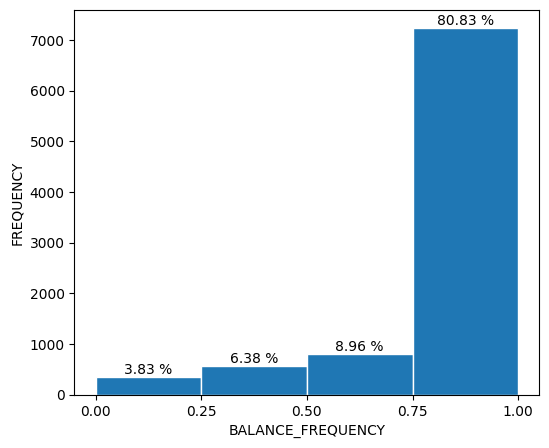

In [25]:
plot_hist(df,'BALANCE_FREQUENCY',[0,0.25,0.5,0.75,1],(6, 5))

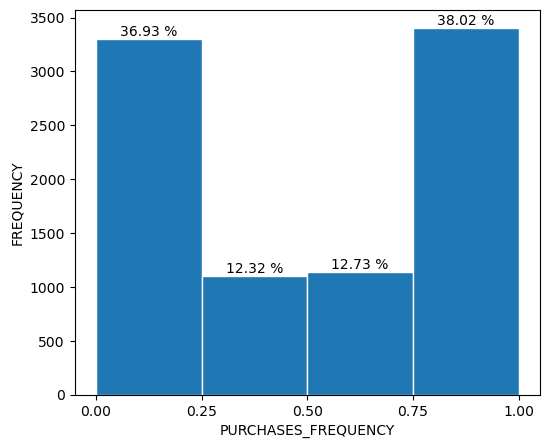

In [21]:
plot_hist(df,'PURCHASES_FREQUENCY',[0,0.25,0.5,0.75,1],(6, 5))

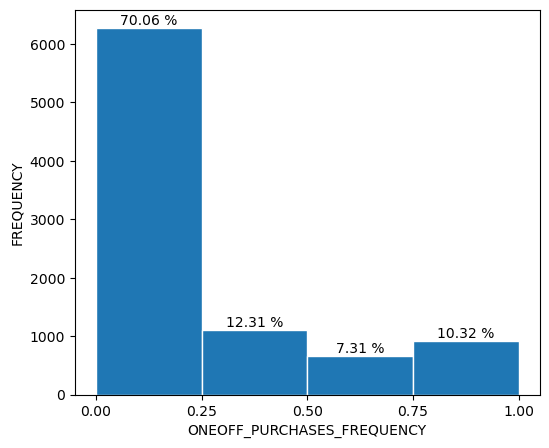

In [22]:
plot_hist(df,'ONEOFF_PURCHASES_FREQUENCY',[0,0.25,0.5,0.75,1],(6, 5))

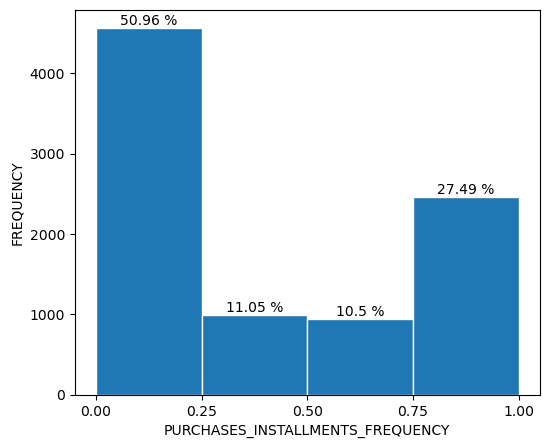

In [23]:
plot_hist(df,'PURCHASES_INSTALLMENTS_FREQUENCY',[0,0.25,0.5,0.75,1],(6, 5))

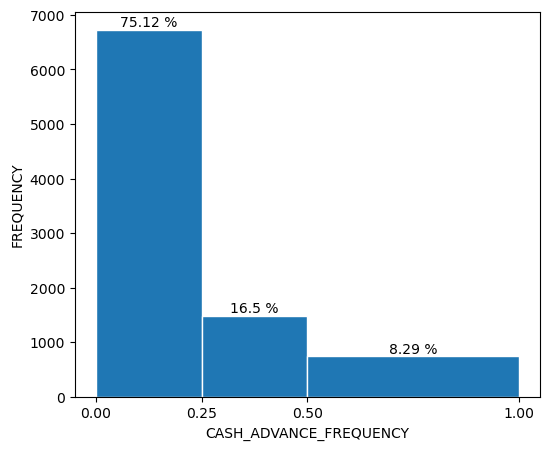

In [24]:
plot_hist(df,'CASH_ADVANCE_FREQUENCY',[0,0.25,0.5,1],(6, 5))

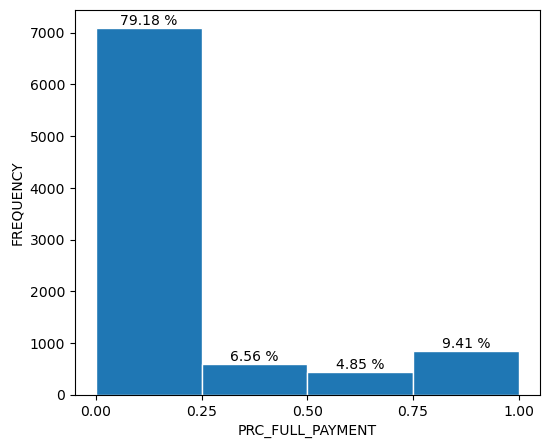

In [25]:
plot_hist(df,'PRC_FULL_PAYMENT',[0,0.25,0.5,0.75,1],(6, 5))

* **BALANCE_FREQUENCY**:

- Approximately 80.39% updates their balance frequently.

* **PURCHASES_FREQUENCY**:

- It can be divided into 3 categories.
- Around 36.93% of customers infrequently purchase.
- Around 25.05% of customers moderately purchase.
- Around 38.02% of customers frequently purchase.

* **ONEOFF_PURCHASES_FREQUENCY**:

- Around 70% make one-off puchases infrequently.

* **PURCHASES_INSTALLMENTS_FREQUENCY**:

- It can be divided into 3 categories.

- Around 50.96% of customers infrequently do installments purchases.
- Around 21.55% of customers moderately do installments purchases.
- Around 27.49% of customers frequently do installments purchases.

* **CASH_ADVANCE_FREQUENCY**:

 - Around 75.12% of customers deal in cash advances.
 
 * **PRC_FULL_PAYMENT**:
 
 - Around 79.18% not paid fully, while the others paid all their balances.


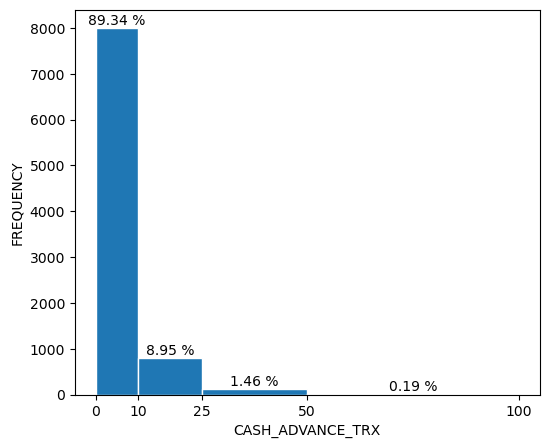

In [26]:
plot_hist(df,'CASH_ADVANCE_TRX',[0,10,25,50,100],(6, 5))

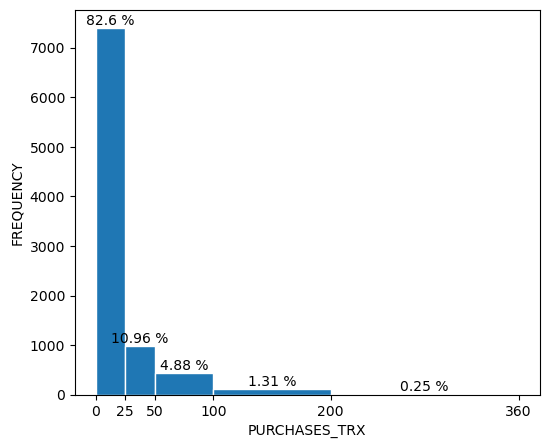

In [27]:
plot_hist(df,'PURCHASES_TRX',[0,25,50,100,200,360],(6, 5))

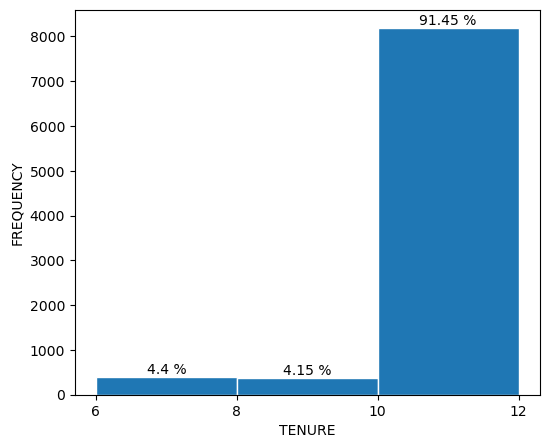

In [28]:
plot_hist(df,'TENURE',[6,8,10,12],(6, 5))

* **CASH_ADVANCE_TRX**:
- The majority (89.34%) don't do transactions with cash in advance, with number of transactions from (0-10).
* **PURCHASES_TRX**:
- The majority (82.6%) make transactions rarely (from 0-25).
* **TENURE**:
- Around 91.45% of people used their credit cards for 12 months.

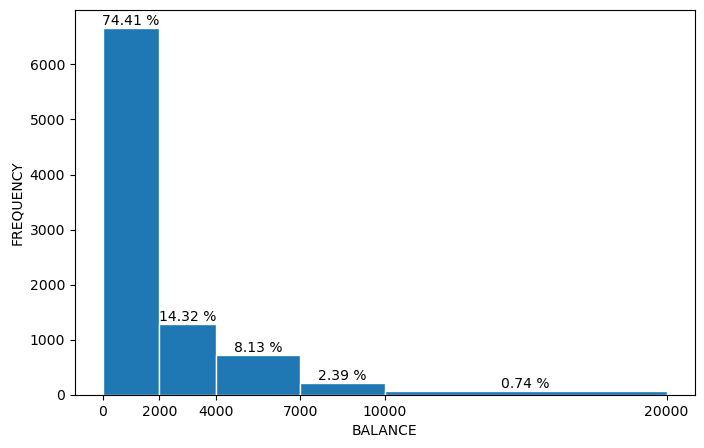

In [29]:
plot_hist(df,'BALANCE',[0,2000,4000,7000,10000,20000],(8, 5))

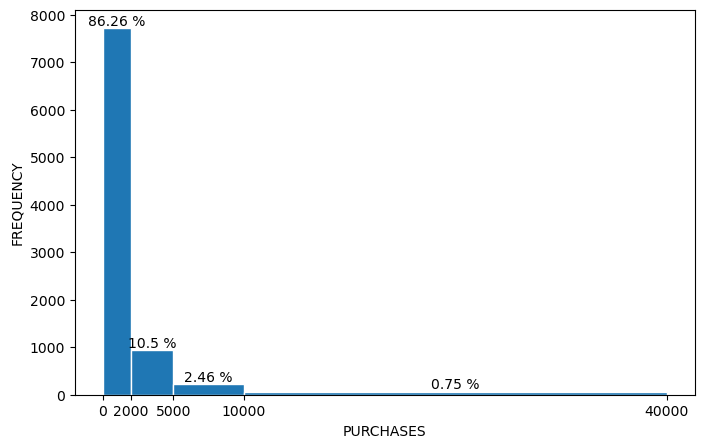

In [30]:
plot_hist(df,'PURCHASES',[0,2000,5000,10000,40000],(8, 5))

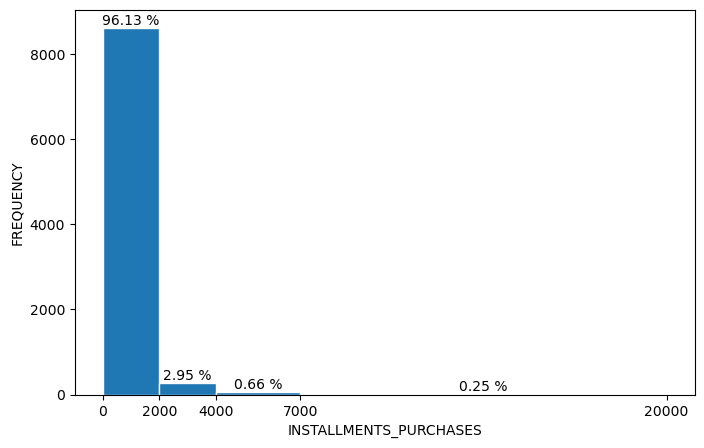

In [31]:
plot_hist(df,'INSTALLMENTS_PURCHASES',[0,2000,4000,7000,20000],(8, 5))

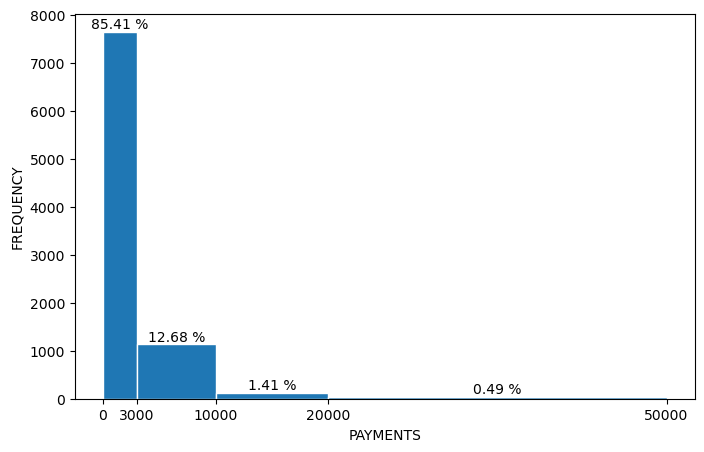

In [32]:
plot_hist(df,'PAYMENTS',[0,3000,10000,20000,50000],(8, 5))

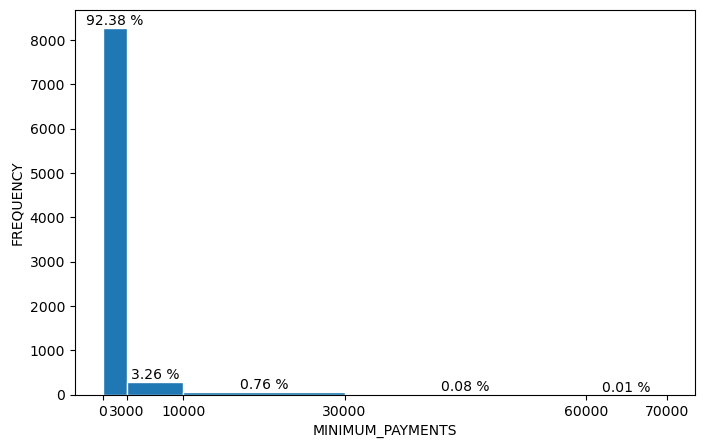

In [33]:
plot_hist(df,'MINIMUM_PAYMENTS',[0,3000,10000,30000,60000,70000],(8, 5))

* **BALANCE** :
- Around 74% of indviduals have remaining balances approximately from (0-2000) US dollar in their accounts.
* **PURCHASES** :
- The majority 86.62% of people made puchases with less than 2000 US dollar and there are outliers.
* **INSTALLMENTS_PURCHASES**:
- The majority 96.13%  make installment purchases less than 2000 US dollar.
* **PAYMENTS**:
- Amount of payments for around 85.4% of users from (0-3000) US dollar, with less than 0.5% with payments from (20000-50000) US dollar.
* **MINIMUM_PAYMENTS**:
- It's unlogical that the maximum minimum payment more than the maximum of payments.

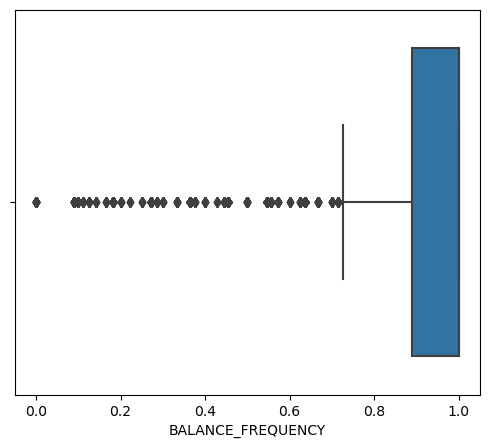

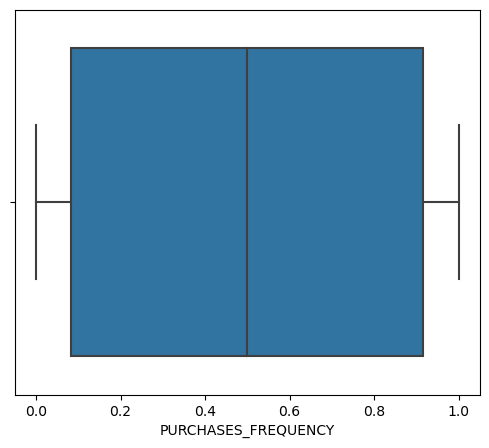

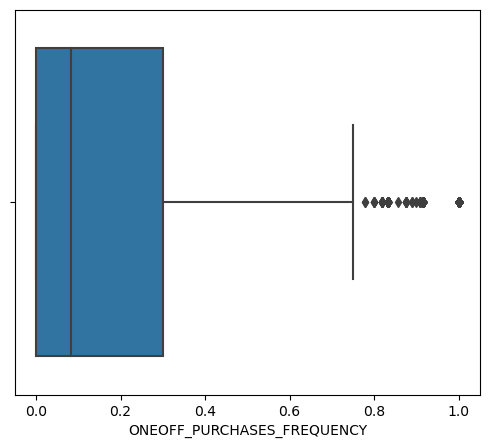

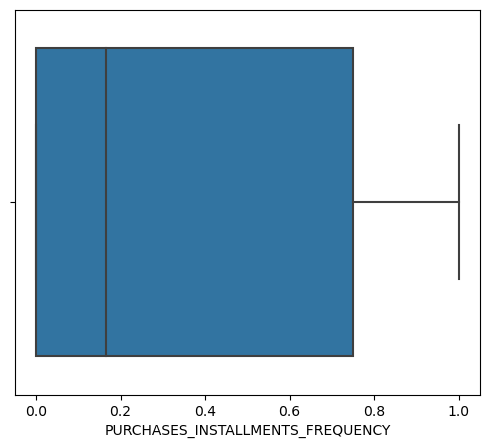

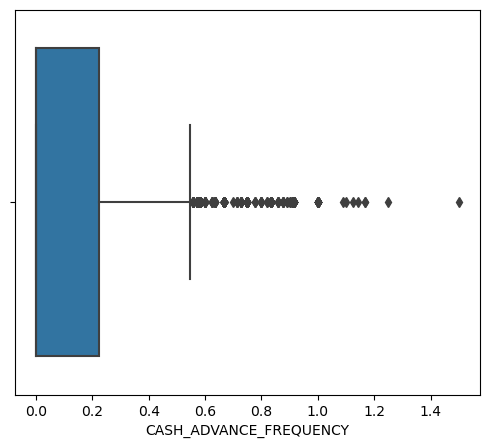

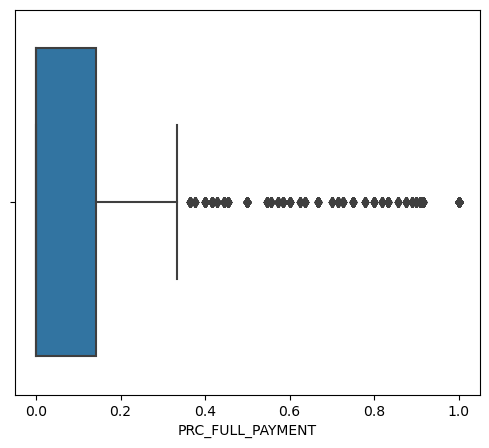

In [35]:
for col in cat_1_cols:
    plt.figure(figsize=(6,5))
    sns.boxplot(x=df[col])

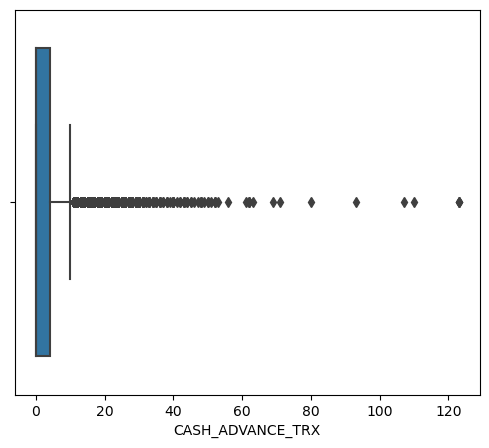

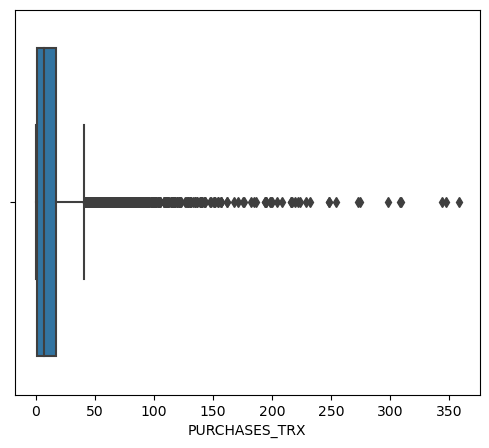

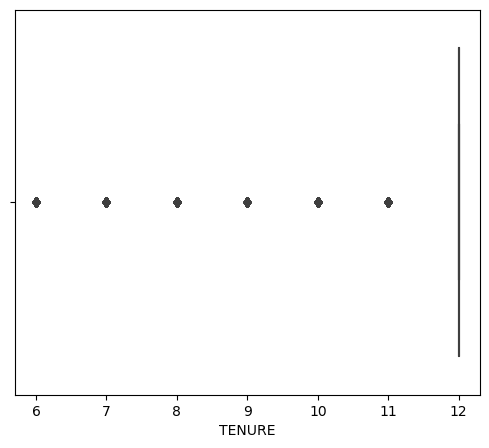

In [36]:
for col in cat_2_cols:
    plt.figure(figsize=(6,5))
    sns.boxplot(x=df[col])

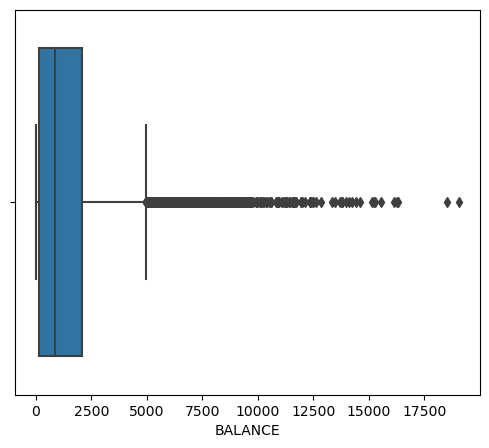

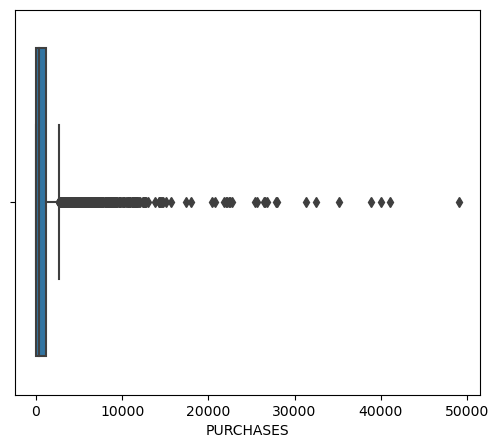

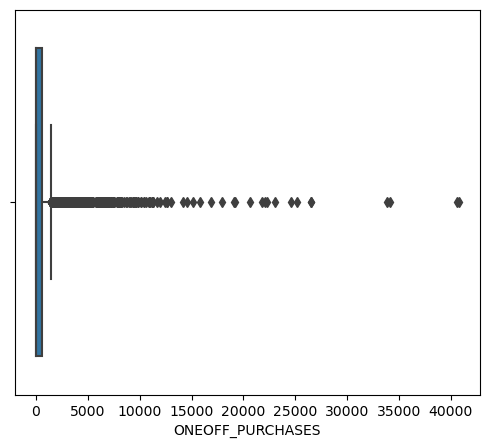

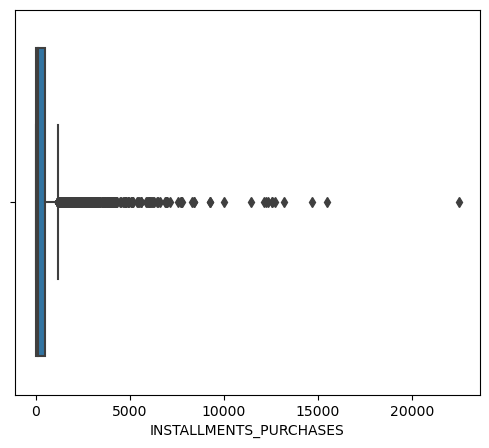

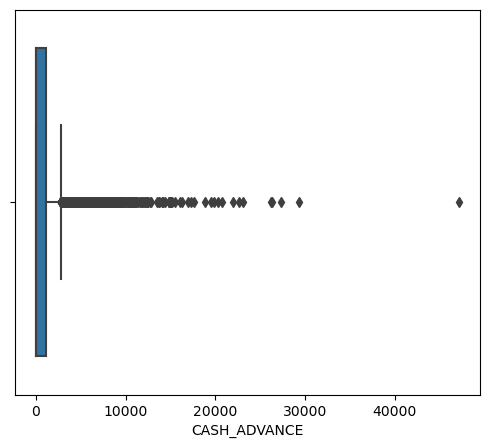

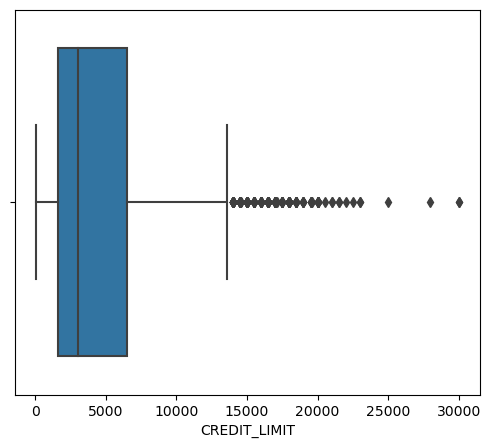

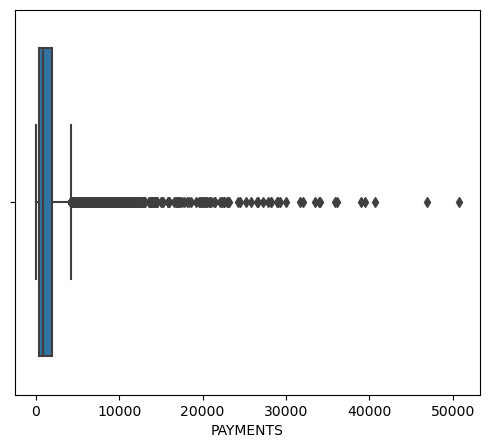

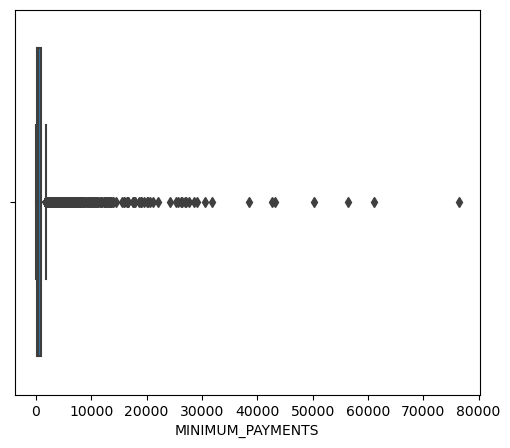

In [37]:
for col in cat_3_cols:
    plt.figure(figsize=(6,5))
    sns.boxplot(x=df[col])

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)



1- Missing Data          <br>
2- Inconsistency         <br>
3- Outliers     <br>

In [26]:
#make a copy for the original dataset
df_copy=df.copy()

In [27]:
df_copy[(df_copy['PAYMENTS']==0) & (df_copy['MINIMUM_PAYMENTS'].isnull())]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.0,NaN,0.0,12
45,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.0,NaN,0.0,12
47,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.0,NaN,0.0,12
55,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.0,NaN,0.0,12
56,3625.218146,1.000000,313.27,313.27,0.0,668.468743,0.250000,0.250000,0.000000,0.416667,5,4,4000.0,0.0,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8854,3.833185,0.125000,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,500.0,0.0,NaN,0.0,8
8919,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.0,NaN,0.0,6
8929,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.0,NaN,0.0,6
8935,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.0,NaN,0.0,6


### First issue

### Missing Values

In [28]:
#solution 

In [29]:
df_copy.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
BALANCE                               0
CASH_ADVANCE_FREQUENCY                0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
BALANCE_FREQUENCY                     0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
TENURE                                0
dtype: int64

In [30]:
df_copy[df_copy['CREDIT_LIMIT'].isnull()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [31]:
df_copy['CREDIT_LIMIT'].fillna(df_copy['CREDIT_LIMIT'].mean(), inplace=True)

In [32]:
df_copy.loc[(df_copy['MINIMUM_PAYMENTS'].isnull()) & (df_copy['PAYMENTS']==0),'MINIMUM_PAYMENTS'] = 0
# We replace these missing values with zero only where the 'PAYMENTS' column is also zero,indicating no payment made by the customer

In [33]:
df_copy.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    73
BALANCE                              0
CASH_ADVANCE_FREQUENCY               0
PRC_FULL_PAYMENT                     0
PAYMENTS                             0
CREDIT_LIMIT                         0
PURCHASES_TRX                        0
CASH_ADVANCE_TRX                     0
PURCHASES_INSTALLMENTS_FREQUENCY     0
BALANCE_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           0
PURCHASES_FREQUENCY                  0
CASH_ADVANCE                         0
INSTALLMENTS_PURCHASES               0
ONEOFF_PURCHASES                     0
PURCHASES                            0
TENURE                               0
dtype: int64

<AxesSubplot:>

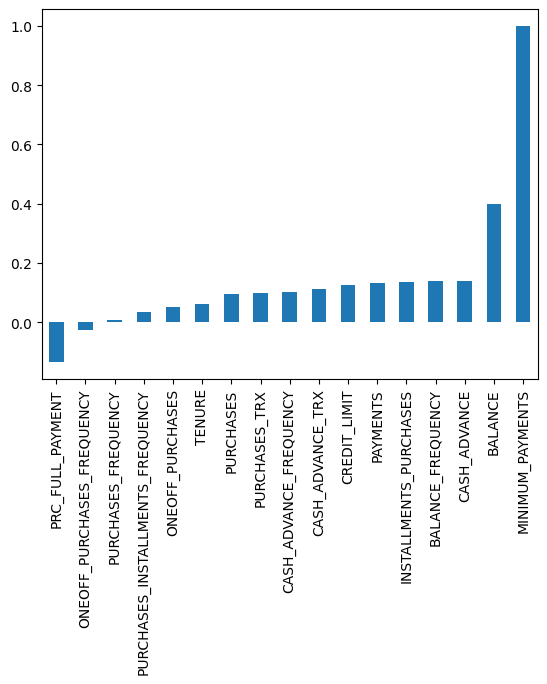

In [34]:
df_copy.corr()['MINIMUM_PAYMENTS'].sort_values(ascending=True).plot(kind='bar')
# There are some columns correlated with 'MINIMUM_PAYMENTS' that we can make use of to fill the remaining null values (313-240)

In [35]:
features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'CREDIT_LIMIT']
# These are the features that can be relevant with 'MINIMUM_PAYMENTS'

#### We can make use of linear regression model to predict null values in 'MINIMUM_PAYMENTS' column

In [36]:
# these are the indices where MINIMUM_PAYMENTS are null
null_indices = np.where(df_copy['MINIMUM_PAYMENTS'].isnull())[0]

In [44]:
X = df_copy[features]
X

,BALANCE,PURCHASES,CASH_ADVANCE,PAYMENTS,CREDIT_LIMIT
0,40.900749,95.40,0.000000,201.802084,1000.0
1,3202.467416,0.00,6442.945483,4103.032597,7000.0
2,2495.148862,773.17,0.000000,622.066742,7500.0
3,1666.670542,1499.00,205.788017,0.000000,7500.0
4,817.714335,16.00,0.000000,678.334763,1200.0
...,...,...,...,...,...
8945,28.493517,291.12,0.000000,325.594462,1000.0
8946,19.183215,300.00,0.000000,275.861322,1000.0
8947,23.398673,144.40,0.000000,81.270775,1000.0
8948,13.457564,0.00,36.558778,52.549959,500.0


In [45]:
y = df_copy['MINIMUM_PAYMENTS']

In [46]:
# Filter rows with null values in the target variable
X_train = X[~y.isnull()]
y_train = y[~y.isnull()]

In [47]:
y_train

0        139.509787
1       1072.340217
2        627.284787
3          0.000000
4        244.791237
           ...     
8944       0.000000
8945      48.886365
8947      82.418369
8948      55.755628
8949      88.288956
Name: MINIMUM_PAYMENTS, Length: 8877, dtype: float64

In [48]:
# Filter rows with null values in the target variable
X_test = X[y.isnull()]

In [49]:
X_test

,BALANCE,PURCHASES,CASH_ADVANCE,PAYMENTS,CREDIT_LIMIT
54,6.660517,310.00,0.000000,417.016763,1000.0
99,0.000000,0.00,89.849004,138.021428,3000.0
146,19.354559,689.70,0.000000,746.691026,10000.0
319,0.478714,734.97,0.000000,1159.135064,6000.0
1155,34.207779,2483.26,0.000000,29272.486070,10000.0
...,...,...,...,...,...
8561,3.229304,190.20,0.000000,295.937124,1500.0
8593,16.887571,1083.00,0.000000,3905.430817,1200.0
8647,0.006651,0.00,164.137866,5.070726,1200.0
8753,0.223351,336.00,0.000000,578.819329,1000.0


In [50]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
len(X_train_scaled)

8877

In [52]:
len(y_train)

8877

In [53]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
# Make predictions for the null values
null_predictions = model.predict(X_test_scaled).reshape(-1,1)

In [55]:
df_copy.loc[y.isnull(),'MINIMUM_PAYMENTS'] = null_predictions

In [67]:
df_copy.loc[df_copy['MINIMUM_PAYMENTS'] < 0,'MINIMUM_PAYMENTS'] = 0

In [68]:
df_copy.isnull().sum().sort_values(ascending=False)

BALANCE                             0
CASH_ADVANCE_FREQUENCY              0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
PURCHASES_INSTALLMENTS_FREQUENCY    0
BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
TENURE                              0
dtype: int64

In [69]:
# df_copy.drop('MINIMUM_PAYMENTS',axis=1,inplace=True)

In [70]:
df_copy['MINIMUM_PAYMENTS'].describe()

count     8950.000000
mean       835.541503
std       2335.552877
min          0.000000
25%        163.752442
50%        291.836705
75%        789.560323
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [71]:
df_copy.isnull().sum().sort_values(ascending=False)

BALANCE                             0
CASH_ADVANCE_FREQUENCY              0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
PURCHASES_INSTALLMENTS_FREQUENCY    0
BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
TENURE                              0
dtype: int64

**Second issue**

### Inconsistency

In [72]:
df_copy[df_copy['BALANCE'] > df_copy['CREDIT_LIMIT']]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5,1809.828751,1.0,1333.28,0.0,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
10,1293.124939,1.0,920.12,0.0,920.12,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,1083.301007,2172.697765,0.000000,12
20,2016.684686,1.0,176.68,0.0,176.68,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,2000.0,223.068600,13557.297260,0.000000,12
64,1923.886805,1.0,1887.64,0.0,1887.64,1605.949371,1.000000,0.000000,1.000000,0.083333,4,61,1850.0,3688.045998,3266.996777,0.083333,12
78,1205.716678,1.0,0.00,0.0,0.00,38.325801,0.000000,0.000000,0.000000,0.083333,1,0,1200.0,29.278671,8242.687678,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,1283.337407,1.0,1022.41,171.6,850.81,1158.035224,0.875000,0.125000,0.750000,0.250000,5,16,1200.0,846.998942,1838.410150,0.000000,8
8614,1182.080141,1.0,266.68,0.0,266.68,848.848179,0.666667,0.000000,0.666667,0.083333,6,8,1000.0,119.861878,8607.234543,0.000000,12
8624,1012.089680,1.0,312.48,0.0,312.48,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1000.0,325.606238,607.957480,0.000000,12
8724,3002.791004,1.0,2463.00,2463.0,0.00,797.158950,0.166667,0.166667,0.000000,0.166667,3,3,3000.0,431.716492,16638.733850,0.000000,12


- The balance amount left in an account to make purchases can exceed the credit limit in certain situations such as 
Pending Transactions: The available balance might include pending transactions that haven't yet been deducted from the account. If these pending transactions exceed the credit limit, it can temporarily result in a balance greater than the limit until they are processed.

In [73]:
df_copy[df_copy['PURCHASES'] > df_copy['CREDIT_LIMIT']]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
12,1516.928620,1.000000,3217.99,2500.23,717.76,0.000000,1.000000,0.250000,0.916667,0.000000,0,26,3000.0,608.263689,490.207013,0.250000,12
51,1078.888565,1.000000,3107.85,2221.74,886.11,0.000000,0.666667,0.583333,0.500000,0.000000,0,18,2500.0,1399.828340,1322.446601,0.000000,12
64,1923.886805,1.000000,1887.64,0.00,1887.64,1605.949371,1.000000,0.000000,1.000000,0.083333,4,61,1850.0,3688.045998,3266.996777,0.083333,12
125,2392.917738,1.000000,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,217,2800.0,11628.715570,2000.990921,0.000000,12
138,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8856,227.220411,1.000000,1387.60,288.54,1099.06,107.660394,1.000000,0.875000,0.875000,0.125000,1,71,1000.0,1217.473837,136.283049,0.142857,8
8883,931.907808,1.000000,1142.12,0.00,1142.12,1113.924335,1.000000,0.000000,0.857143,0.285714,3,14,1000.0,957.421268,1064.015704,0.000000,7
8897,328.686581,1.000000,2806.78,2588.53,218.25,0.000000,0.857143,0.714286,0.285714,0.000000,0,26,1200.0,1796.886852,93.017466,0.250000,7
8898,379.288635,0.714286,550.00,50.00,500.00,388.818230,0.571429,0.142857,0.571429,0.142857,2,6,500.0,509.404913,531.988210,0.000000,7


Purchases exceeding credit limit may be because:

- Pending Transactions: If there are pending transactions, transactions that haven't yet been processed by the bank, the available balance might temporarily exceed the credit limit until those transactions are finalized.

- Overpayments:: If there are refunds posted to the account, they can increase the available balance beyond the credit limit until new transactions bring it back within the limit.

In [74]:
df_copy[df_copy['INSTALLMENTS_PURCHASES'] > df_copy['CREDIT_LIMIT']]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
64,1923.886805,1.000000,1887.64,0.00,1887.64,1605.949371,1.000000,0.000000,1.000000,0.083333,4,61,1850.0,3688.045998,3266.996777,0.083333,12
180,903.297810,1.000000,2697.48,150.50,2546.98,0.000000,1.000000,0.333333,1.000000,0.000000,0,39,2500.0,1686.196344,303.361632,0.000000,12
185,168.522709,0.818182,2009.05,0.00,2009.05,0.000000,0.833333,0.000000,0.750000,0.000000,0,22,1200.0,2612.760497,197.638558,0.142857,12
231,279.608696,1.000000,3034.92,0.00,3034.92,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2900.0,2928.909865,2733.317012,0.083333,12
295,635.090434,0.818182,5758.71,2252.37,3506.34,0.000000,0.750000,0.250000,0.750000,0.000000,0,48,2900.0,7943.570210,197.416104,1.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8788,133.099445,1.000000,1170.00,0.00,1170.00,0.000000,1.000000,0.000000,0.900000,0.000000,0,12,1000.0,1068.502534,161.816503,0.444444,10
8836,112.037368,1.000000,1006.69,0.00,1006.69,0.000000,1.000000,0.000000,0.888889,0.000000,0,11,1000.0,1000.036596,123.408318,1.000000,9
8837,272.624436,0.888889,1843.00,470.00,1373.00,0.000000,0.666667,0.111111,0.444444,0.000000,0,6,1000.0,1477.357626,140.980969,0.400000,9
8856,227.220411,1.000000,1387.60,288.54,1099.06,107.660394,1.000000,0.875000,0.875000,0.125000,1,71,1000.0,1217.473837,136.283049,0.142857,8


- Installments purchases exceeding credit limit may be because bank system has not yet updated the credit limit, but already approved the installment.

In [75]:
df_copy[df_copy['CASH_ADVANCE_FREQUENCY']>1]['CASH_ADVANCE_FREQUENCY']

681     1.250000
1626    1.166667
2555    1.125000
2608    1.100000
3038    1.500000
3253    1.166667
8055    1.090909
8365    1.142857
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

- Frequencies can't be > 1
- Since the amount of cash_advance_frequency above 1 are very little, we decide to change the amount to 1, with assumption that the change will not harm the data distribution.

In [76]:
df_copy.loc[df_copy['CASH_ADVANCE_FREQUENCY'] > 1, 'CASH_ADVANCE_FREQUENCY'] = 1

In [77]:
df_copy[df_copy['CASH_ADVANCE_FREQUENCY']>1]['CASH_ADVANCE_FREQUENCY'].sum()

0.0

In [78]:
df_copy.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.134972,3.248827,14.709832,4494.449450,1733.143852,835.541503,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.199257,6.824647,24.857649,3638.612411,2895.063757,2335.552877,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.752442,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,291.836705,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,789.560323,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


***Third issue***

Outliers

In [79]:
#solution 

In [80]:
df_copy.dtypes 

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

Text(0.5, 1.0, 'Data Before Scaling')

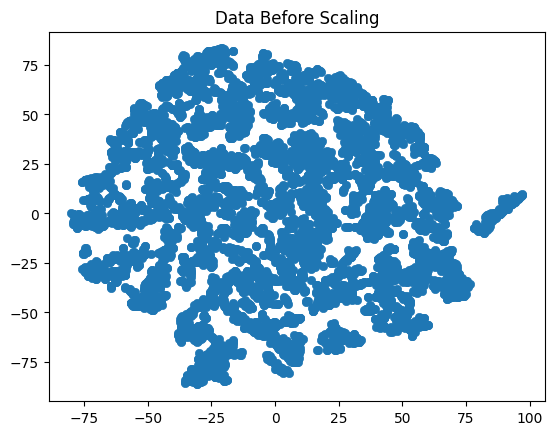

In [81]:
t_sne = TSNE()
results = t_sne.fit_transform(df_copy)
t_sne_1 = results[:,0]
t_sne_2 = results[:,1]

sns.scatterplot(x=t_sne_1, y=t_sne_2, edgecolor=None)
plt.title('Data Before Scaling')

***Data Scaling***

In [82]:
# Excluding columns that already have values within the range of 0 to 1
robust_scaler = RobustScaler()
scaled_df = pd.DataFrame(robust_scaler.fit_transform(df_copy[cat_2_cols + cat_3_cols]), columns=cat_2_cols + cat_3_cols)

In [83]:
df_copy = df_copy.reset_index(drop=True)

In [84]:
robust_df = pd.concat((scaled_df, df_copy[cat_1_cols]), axis=1)

In [85]:
robust_df.head()

,CASH_ADVANCE_TRX,PURCHASES_TRX,TENURE,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PRC_FULL_PAYMENT
0,0.00,-0.3125,0.0,-0.432267,-0.248371,-0.065812,0.013657,0.000000,-0.408163,-0.431595,-0.243408,0.818182,0.166667,0.000000,0.083333,0.000000,0.000000
1,1.00,-0.4375,0.0,1.209374,-0.337489,-0.065812,-0.189912,5.784542,0.816327,2.138626,1.247193,0.909091,0.000000,0.000000,0.000000,0.250000,0.222222
2,0.00,0.3125,0.0,0.842099,0.384766,1.273231,-0.189912,0.000000,0.918367,-0.154715,0.536024,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
3,0.25,-0.3750,0.0,0.411913,1.062798,2.530286,-0.189912,0.184759,0.918367,-0.564547,-0.466336,0.636364,0.083333,0.083333,0.000000,0.083333,0.000000
4,0.00,-0.3750,0.0,-0.028907,-0.322542,-0.038102,-0.189912,0.000000,-0.367347,-0.117644,-0.075176,1.000000,0.083333,0.083333,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'T-SNE after Robust Scaling')

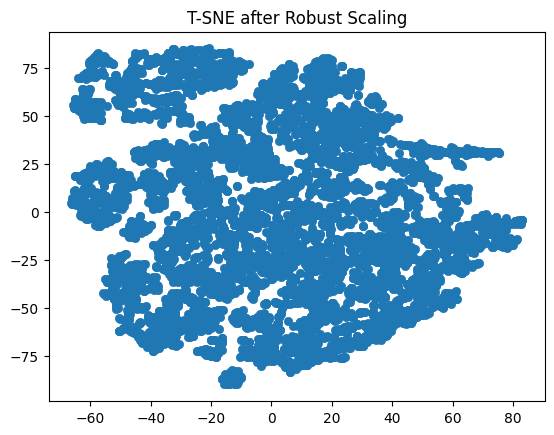

In [86]:
t_sne = TSNE(init='pca')
results = t_sne.fit_transform(robust_df)
t_sne_1 = results[:,0]
t_sne_2 = results[:,1]

sns.scatterplot(x=t_sne_1, y=t_sne_2, edgecolor=None)
plt.title('T-SNE after Robust Scaling')
# Scaling provided more structure or agglomeration to data

***Data Transformation***

In [87]:
transformer = PowerTransformer(method = 'yeo-johnson')
robust_df = pd.DataFrame(transformer.fit_transform(robust_df), columns= df_copy.columns)

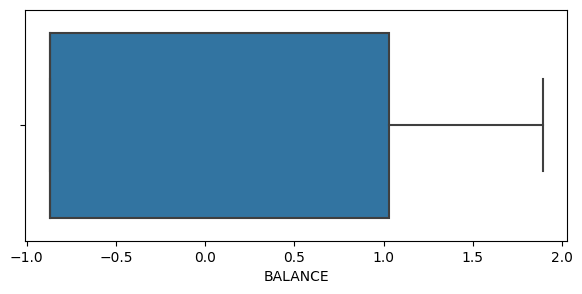

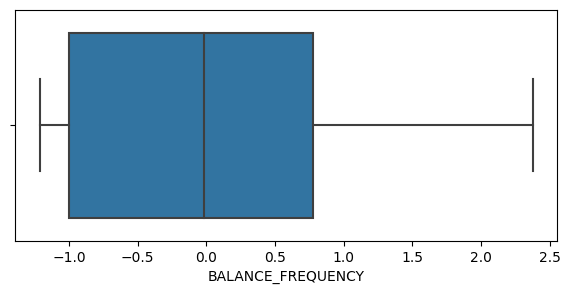

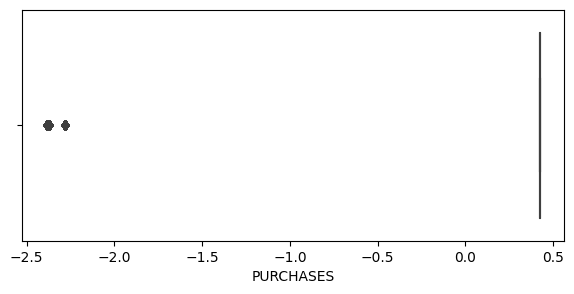

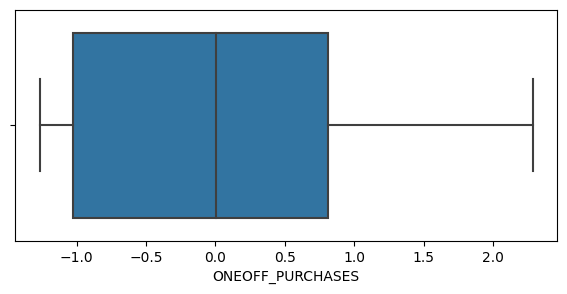

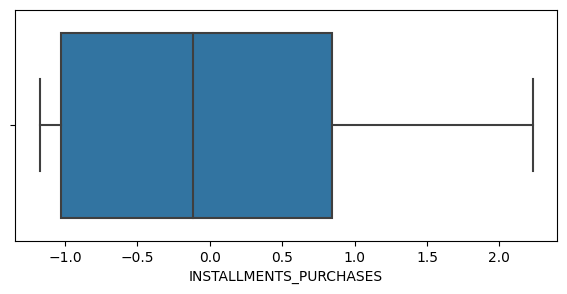

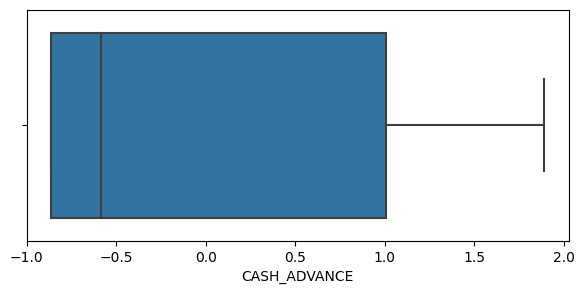

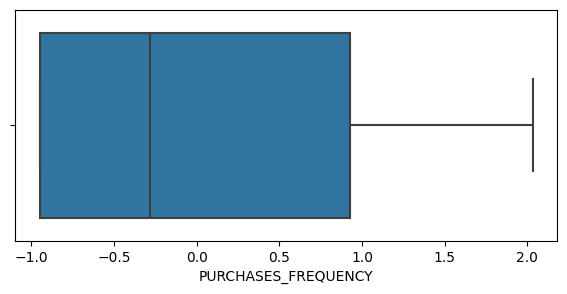

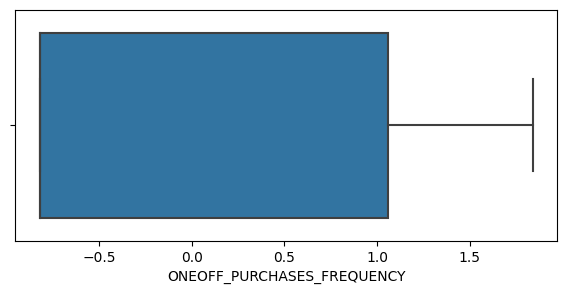

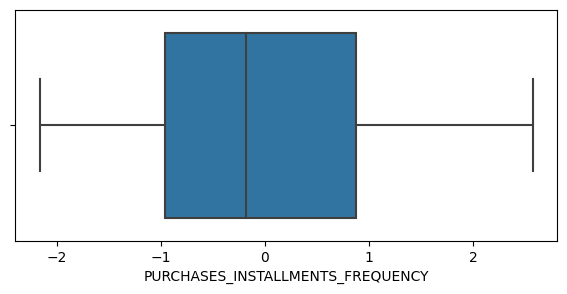

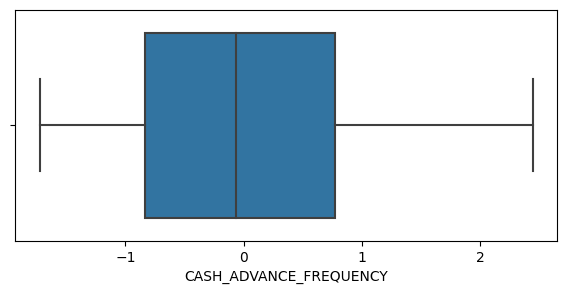

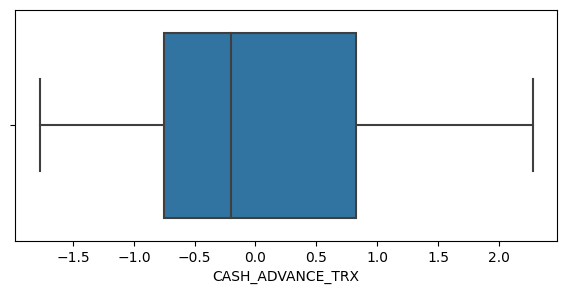

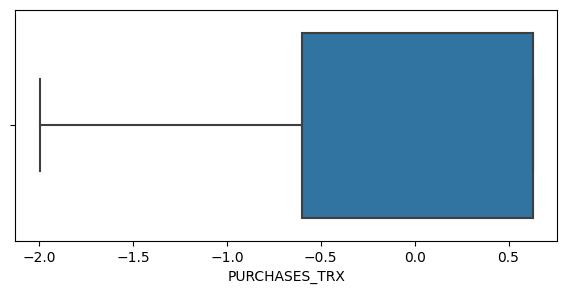

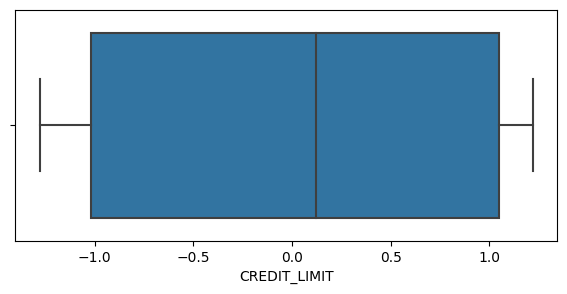

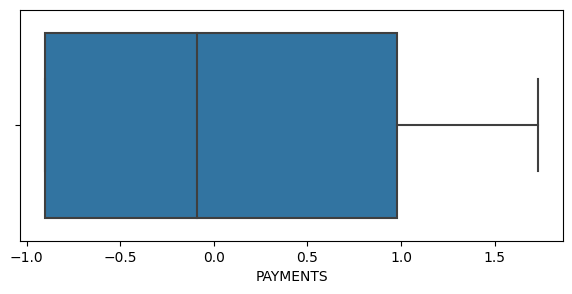

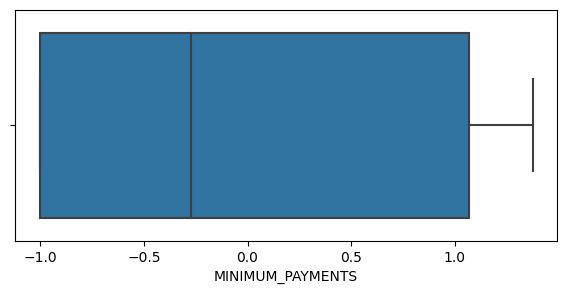

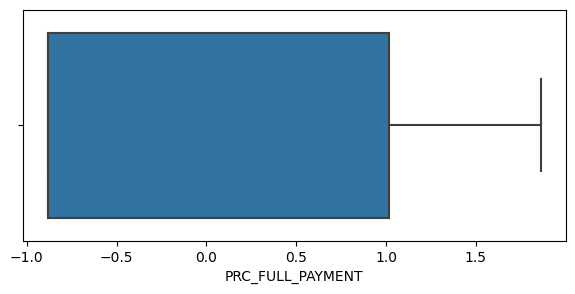

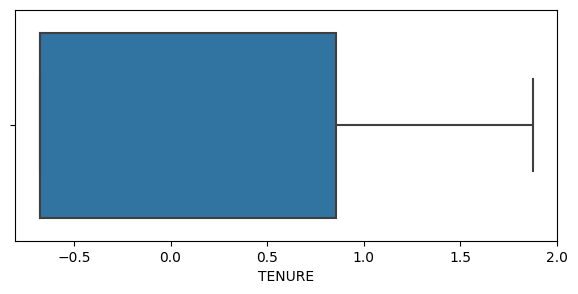

In [88]:
for col in robust_df.columns:
    plt.figure(figsize=(7,3))
    sns.boxplot(x=robust_df[col])

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

* **RobustlScaler** : it uses statistics that are more robust to outliers such as median and IQR.

* **Yeo-Johnson** : it can handle all values postitive, negative and zeros (the data has zero values) ,and it allows for greater flexibility in skewness reduction compared to the Box-Cox transformation.

* # Applying different scaling technique

* StandardScaler

In [89]:
std_scaler = StandardScaler()
std_scaled_df = pd.DataFrame(std_scaler.fit_transform(df_copy), columns=df_copy.columns)

In [90]:
transformer = PowerTransformer(method = 'yeo-johnson')
std_df = pd.DataFrame(transformer.fit_transform(std_scaled_df), columns= df_copy.columns)

Text(0.5, 1.0, 'T-SNE after Standard Scaling')

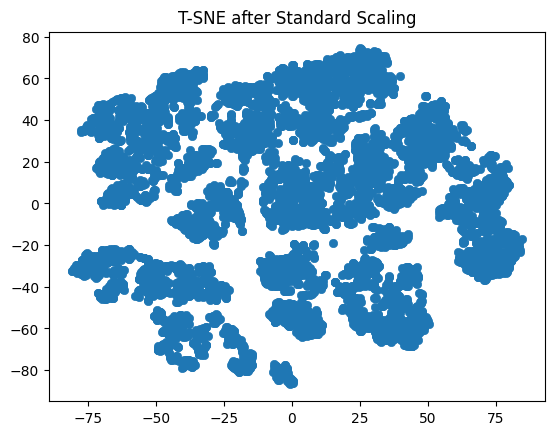

In [91]:
t_sne = TSNE(init='pca')
results = t_sne.fit_transform(std_df)
t_sne_1 = results[:,0]
t_sne_2 = results[:,1]

sns.scatterplot(x=t_sne_1, y=t_sne_2, edgecolor=None)
plt.title('T-SNE after Standard Scaling') 

* MinMaxScaler

In [92]:
minmax_scaler = MinMaxScaler()
minmax_scaled_df = pd.DataFrame(minmax_scaler.fit_transform(df_copy), columns=df_copy.columns)

In [93]:
transformer = PowerTransformer(method = 'yeo-johnson')
minmax_df = pd.DataFrame(transformer.fit_transform(minmax_scaled_df), columns= df_copy.columns)

Text(0.5, 1.0, 'T-SNE after Min-Max Scaling')

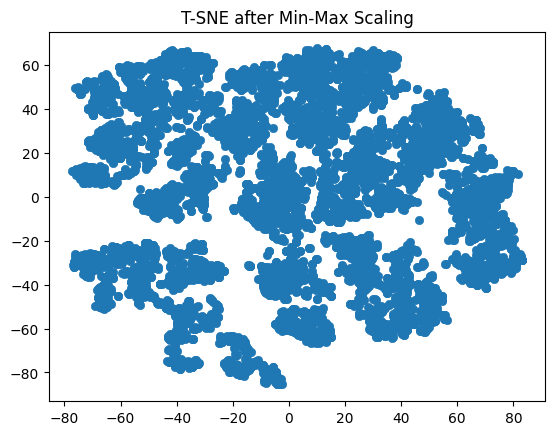

In [94]:
t_sne = TSNE(init='pca')
results = t_sne.fit_transform(minmax_df)
t_sne_1 = results[:,0]
t_sne_2 = results[:,1]

sns.scatterplot(x=t_sne_1, y=t_sne_2, edgecolor=None)
plt.title('T-SNE after Min-Max Scaling')

- Standard scaling gives more structure than robust and minmax

## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)


* Distortion is the average of the euclidean squared distance from the centroid of the respective clusters. 
* Inertia is the sum of squared distances of samples to their closest cluster centre.

**1 - Kmeans Manual Implementation**

In [123]:
class K_means():
    
    def __init__(self,X,K):
        self.X = X
        self.K = K
        self.centroids = self._kMeansInitCentroids()
        self.idx = np.zeros((self.X.shape[0],1))
        self.converged_iter = -1
        
    def _kMeansInitCentroids(self):
    
        m, n = self.X.shape
        random.seed(42)
        centroids = np.zeros((self.K,n))

        for k in range(self.K):
            centroids[k] = random.choice(self.X)
        
        return centroids
    
    def _computeCentroids(self):
        m,n = self.X.shape
        centroids = np.zeros((self.K,n))
        
        for k in range(self.K):
            centroids[k] = np.mean(self.X[self.idx == k],axis=0)
            
        self.centroids = centroids
        return self.centroids
        
        
    def _findClosestCentroids(self,X):

        m = X.shape[0]
        distances = np.zeros((m,self.K))
        idx = np.zeros((m,1)).astype(np.int16)

        for k in range(self.K):

            distances[:,k] = np.linalg.norm(X - self.centroids[k],axis=1)

        idx = np.argmin(distances,axis=1)

        return idx
    
    
    def fit(self,max_iter=100, threshold= 1e-6):
        
        centroids_prev = self.centroids

        for i in range(max_iter):
            
            self.idx = self._findClosestCentroids(self.X)
            self.centroids = self._computeCentroids()

            if np.linalg.norm(self.centroids-centroids_prev) < threshold:
                
                # print(f'converged at iteration {i}')
                self.converged_iter = i
                break
                
            centroids_prev = self.centroids

        return self.centroids, self.idx
    
    
    def compute_inertia(self):
        inertia = 0
        
        for k in range(self.K):
            inertia += np.sum(np.linalg.norm((self.X[self.idx == k] - self.centroids[k]), axis=1) ** 2)
        
        return inertia
    
    
    def compute_distortion(self):
        distortion = 0
        
        for k in range(self.K):
            
            cluster_points = self.X[self.idx == k]
            
            distortion += np.sum(np.linalg.norm(( cluster_points - self.centroids[k]), axis=1) ** 2) / len(self.X)
        
        return distortion
    
    
    def elbow_plot(self, max_K, method = 'inertia'):
        variances = []
        
        if method == 'inertia':

            for k in range(1, max_K + 1):
                kmeans = K_means(self.X, k)
                centroids, idx = kmeans.fit()
                inertia = kmeans.compute_inertia()
                variances.append(inertia)
        
        elif method == 'distortion':
            for k in range(1, max_K + 1):
                kmeans = K_means(self.X, k)
                centroids, idx = kmeans.fit()
                distortion = kmeans.compute_distortion()
                variances.append(distortion)
        else:
            
            raise(f'{method} undefined')
        
        plt.plot(range(1, max_K + 1), variances, marker='o')
        plt.xlabel('Number of clusters (K)')
        plt.ylabel(f'{method}')
        plt.title('Elbow Plot')
        plt.show()
    
    def predict(self,x):
    
        label  = self._findClosestCentroids(x)
        return label

### i - Using RobustScaler

- **Determining the best number of clusters using Silhouette Score**

In [124]:
scores = []
K = range(2,21)
for k in K:
    kmeans = KMeans(n_clusters = k).fit(robust_df)
    labels = kmeans.labels_
    scores.append(silhouette_score(robust_df, labels, metric = 'euclidean'))

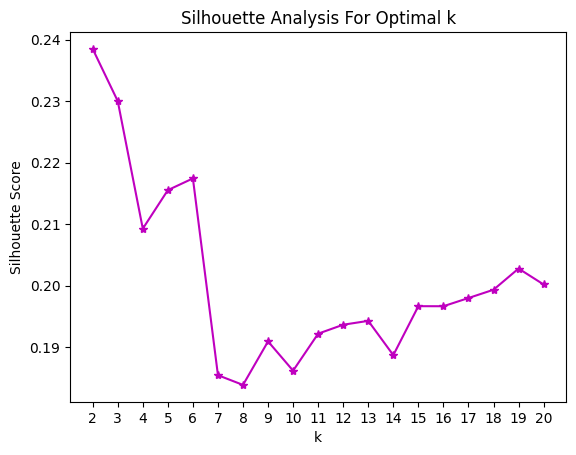

In [125]:
plt.plot(K, scores,marker= '*',color='m')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.xticks(K)
plt.show()

In [129]:
k = 6
k_mean = K_means(robust_df.values,k)

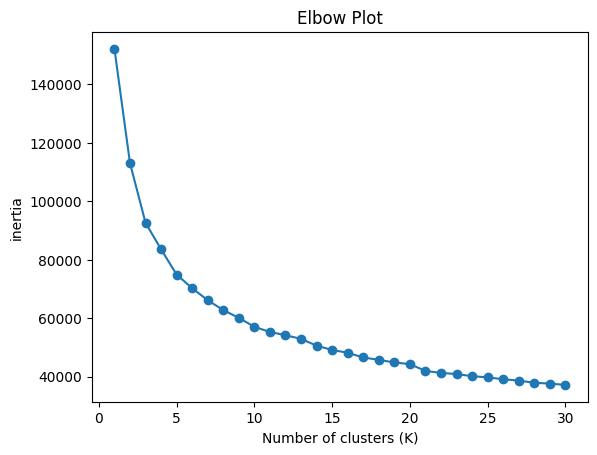

In [130]:
# Elbow Method using Inertia
k_mean.elbow_plot(30,method='inertia')

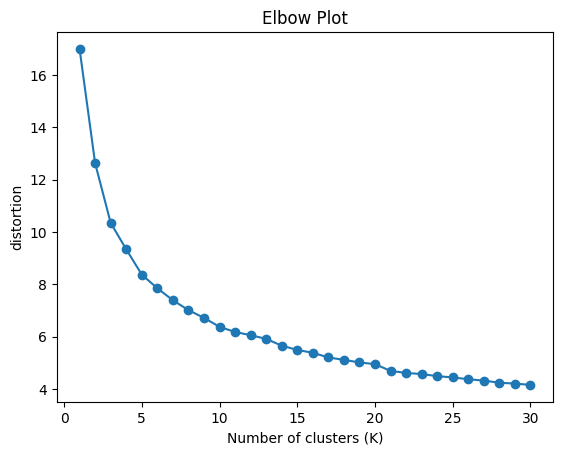

In [128]:
#  Elbow Method using Distortion
k_mean.elbow_plot(30, method='distortion')

In [81]:
# K = 6 seems Ok 

**K = 6**

In [131]:
k_mean.fit()
print(f'converged at iteration : {k_mean.converged_iter}')

converged at iteration : 27


In [132]:
k_mean.predict((robust_df.iloc[1,:]).values.reshape(1,-1)) # label for single sample

array([2], dtype=int64)

In [133]:
k_mean.K

6

In [134]:
labels = k_mean.predict(robust_df.values)
labels

array([1, 2, 4, ..., 5, 1, 4], dtype=int64)

In [135]:
silhouette = silhouette_score(robust_df, labels)
print("silhouette_score is :", silhouette)

silhouette_score is : 0.21743804737291308


Text(0.5, 1.0, 'T-SNE')

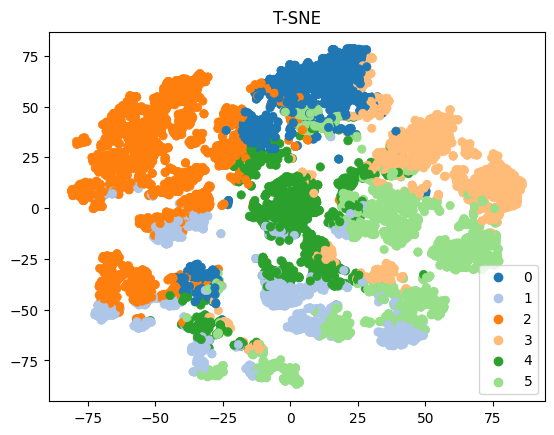

In [136]:
t_sne = TSNE(init='pca')  #initialize with pca for better results
results = t_sne.fit_transform(robust_df)
t_sne_1 = results[:,0]
t_sne_2 = results[:,1]

sns.scatterplot(x=t_sne_1, y=t_sne_2, hue = labels, palette="tab20", edgecolor=None)
plt.title('T-SNE')

**K = 7**

In [138]:
k = 7
k_mean = K_means(robust_df.values,k)
k_mean.fit()
print(f'converged at iteration : {k_mean.converged_iter}')

converged at iteration : 28


In [139]:
labels = k_mean.predict(robust_df.values)

In [140]:
silhouette = silhouette_score(robust_df, labels)
print("silhouette_score is :", silhouette)

silhouette_score is : 0.1852250887934824


Text(0.5, 1.0, 'T-SNE')

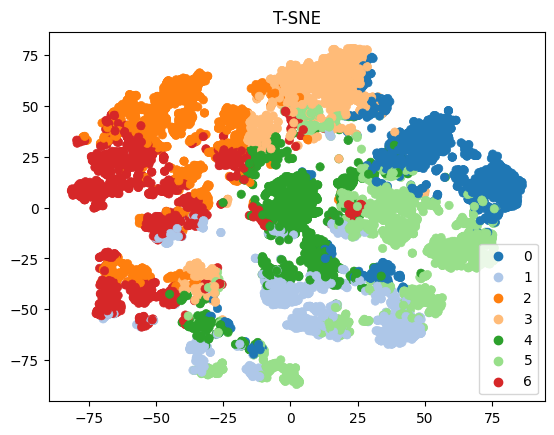

In [142]:
t_sne = TSNE(init='pca')
results = t_sne.fit_transform(robust_df)
t_sne_1 = results[:,0]
t_sne_2 = results[:,1]

sns.scatterplot(x=t_sne_1, y=t_sne_2,hue = labels, palette="tab20", edgecolor=None)
plt.title('T-SNE')

### ii - Using StandardScaler

In [143]:
scores = []
K = range(2,21)
for k in K:
    kmeans = KMeans(n_clusters = k).fit(std_df)
    labels = kmeans.labels_
    scores.append(silhouette_score(std_df, labels, metric = 'euclidean'))

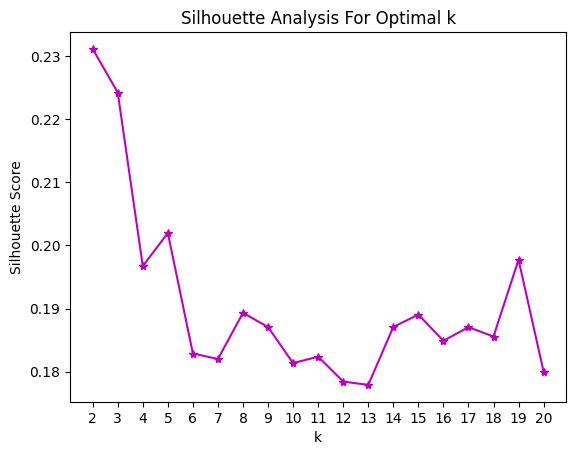

In [144]:
plt.plot(K, scores,marker= '*',color='m')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.xticks(K)
plt.show()

In [145]:
k = 5
k_mean_2 = K_means(std_df.values,k)

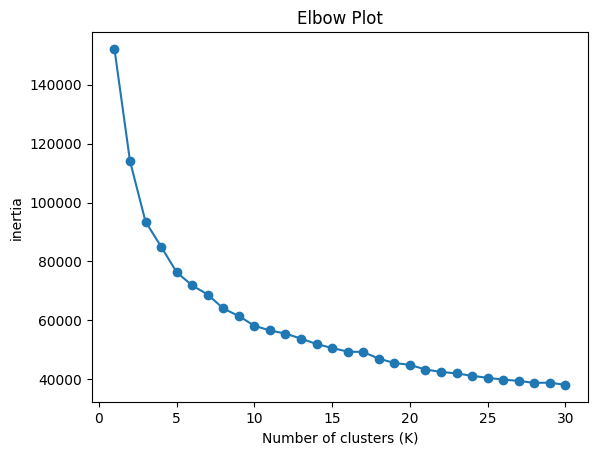

In [146]:
# Elbow Method using Inertia
k_mean_2.elbow_plot(30,method='inertia')

In [147]:
k_mean_2.fit()
print(f'converged at iteration : {k_mean.converged_iter}')

converged at iteration : 28


In [148]:
labels = k_mean_2.predict(std_df.values)

Text(0.5, 1.0, 'T-SNE')

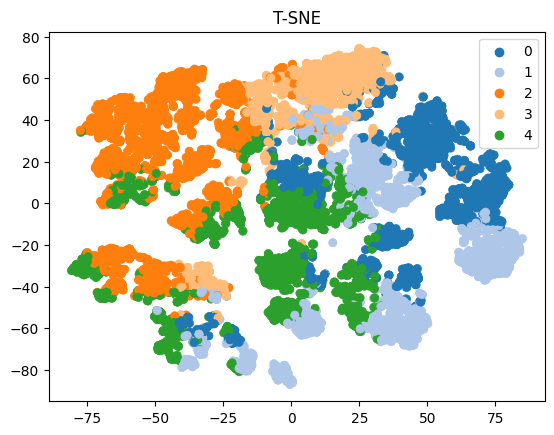

In [149]:
t_sne = TSNE(init='pca')
results = t_sne.fit_transform(std_df)
t_sne_1 = results[:,0]
t_sne_2 = results[:,1]

sns.scatterplot(x=t_sne_1, y=t_sne_2,hue = labels, palette="tab20", edgecolor=None)
plt.title('T-SNE')

In [150]:
silhouette = silhouette_score(std_df, labels)
print("silhouette_score is :", silhouette)

silhouette_score is : 0.20193947804624857


### iii - Using MinMaxScaler

In [151]:
scores = []
K = range(2,21)
for k in K:
    kmeans = KMeans(n_clusters = k).fit(minmax_df)
    labels = kmeans.labels_
    scores.append(silhouette_score(minmax_df, labels, metric = 'euclidean'))

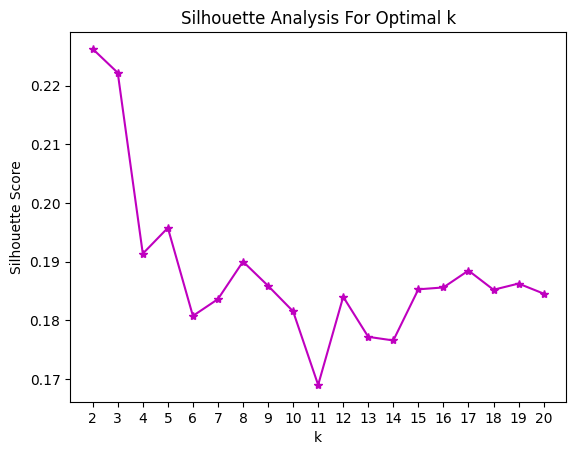

In [152]:
plt.plot(K, scores,marker= '*',color='m')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.xticks(K)
plt.show()

In [153]:
k = 5
k_mean_3 = K_means(minmax_df.values,k)

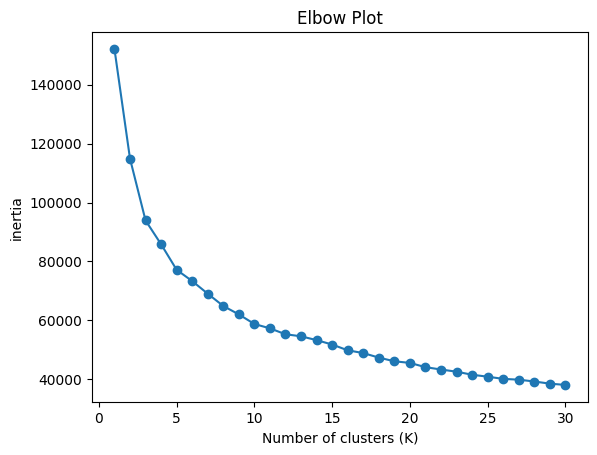

In [155]:
# Elbow Method using Inertia
k_mean_3.elbow_plot(30,method='inertia')

In [156]:
k_mean_3.fit()
print(f'converged at iteration : {k_mean.converged_iter}')

converged at iteration : 28


In [157]:
labels = k_mean_3.predict(minmax_df.values)

Text(0.5, 1.0, 'T-SNE')

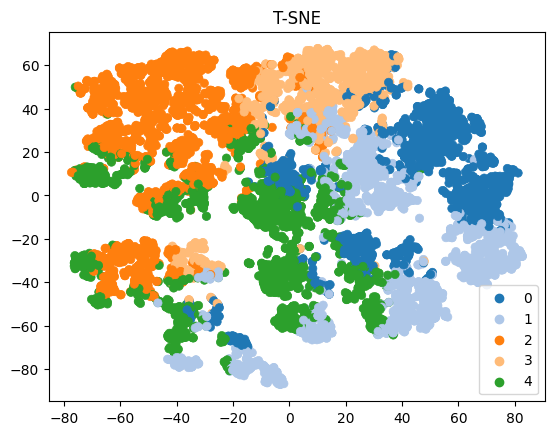

In [158]:
t_sne = TSNE(init='pca')
results = t_sne.fit_transform(minmax_df)
t_sne_1 = results[:,0]
t_sne_2 = results[:,1]

sns.scatterplot(x=t_sne_1, y=t_sne_2,hue = labels, palette='tab20', edgecolor=None)
plt.title('T-SNE')

In [159]:
silhouette = silhouette_score(minmax_df, labels)
print("silhouette_score is :", silhouette)

silhouette_score is : 0.19598290566406007


____________________________________________

***(When K=5)***

Convergence iteration :
StandardScaler = MinmaxScaler = RobustScaler 

Silhouette Score :
 RobustScaler > StandardScaler > MinmaxScaler 
 
 Conclusion: RobustScaler is the best scaling approach among the three approaches.

However, the clustering results appear to be unsatisfactory when using the three scalers.

We may consider experimenting with a different scaler (e.g. log transformation) to potentially improve the quality of the clustering results.

______________________________________

## Trying another transformations

- Since the previous tranformations didn't perform well, we need to try different tranformation technique such as : log transformation.

In [161]:
df_copy.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Log Transformation

In [162]:
change_zero = lambda value: value+1 if value==0 else value

In [163]:
df_copy_2 = df_copy.copy()

In [164]:
for col in df_copy_2[cat_2_cols + cat_3_cols]:
    df_copy_2[col] = np.log(df_copy_2[col].apply(change_zero))
    
df_copy_2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.711148,0.818182,4.558079,0.000000,4.558079,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,0.693147,6.907755,5.307287,4.938135,0.000000,2.484907
1,8.071677,0.909091,0.000000,0.000000,0.000000,8.770741,0.000000,0.000000,0.000000,0.250000,1.386294,0.000000,8.853665,8.319482,6.977599,0.222222,2.484907
2,7.822104,1.000000,6.650499,6.650499,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.484907,8.922658,6.433047,6.441401,0.000000,2.484907
3,7.418583,0.636364,7.312553,7.312553,0.000000,5.326847,0.083333,0.083333,0.000000,0.083333,0.000000,0.000000,8.922658,0.000000,0.000000,0.000000,2.484907
4,6.706513,1.000000,2.772589,2.772589,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.000000,7.090077,6.519641,5.500406,0.000000,2.484907


Text(0.5, 1.0, 'T-SNE after Log Transformation')

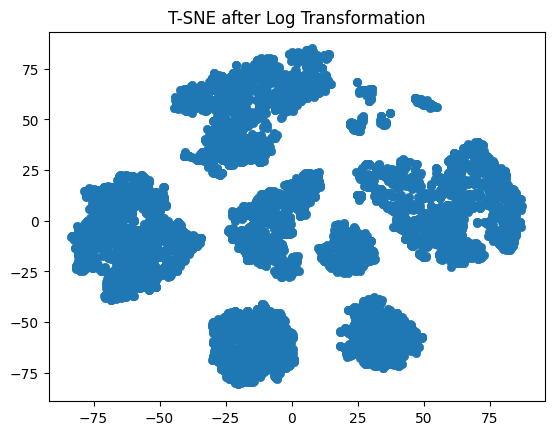

In [165]:
t_sne = TSNE(init='pca')
results = t_sne.fit_transform(df_copy_2)
t_sne_1 = results[:,0]
t_sne_2 = results[:,1]

sns.scatterplot(x=t_sne_1, y=t_sne_2, palette='tab10', edgecolor=None)
plt.title('T-SNE after Log Transformation')

After applying Log Transformation, there has been a noticable improvement in the structure.

___________________________________________________________________________

#### By repeating the steps:

### Finding Optimum Value of K

### Elbow method

In [166]:
inertias = []
K = range(2,21)
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_copy_2)
    inertia = kmeans.inertia_
    inertias.append(inertia)

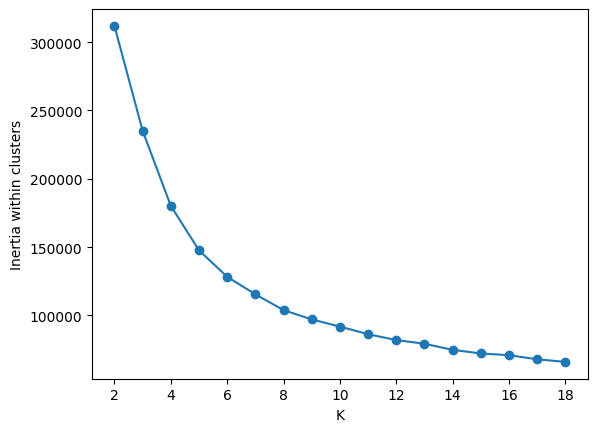

In [167]:
plt.plot(K[:17],inertias[:17], marker = 'o')
plt.xlabel('K')
plt.ylabel('Inertia within clusters');

From the previos graph, the best number of clusters is 7 (using elbow method)

### Silhoutte Score

In [168]:
sil = []
K = range(2,21)
for k in K:
    kmeans = KMeans(n_clusters = k).fit(df_copy_2)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_copy_2, labels))

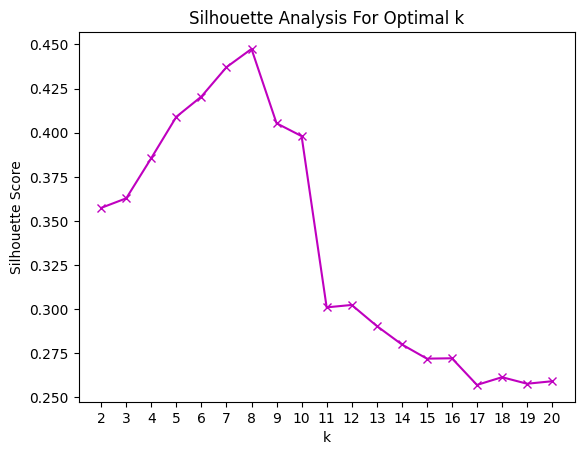

In [169]:
plt.plot(K, sil,color='m', marker= 'x')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.xticks(K)
plt.show()

From the graph, 7 will work (using silhouette method)

In [170]:
kmeans = KMeans(n_clusters=7 ,init="k-means++")
kmeans = kmeans.fit(df_copy_2)
labels = kmeans.labels_

In [171]:
silhouette_score(df_copy_2, labels)

0.43712662884978487

Text(0.5, 1.0, 'T-SNE After Applying Log')

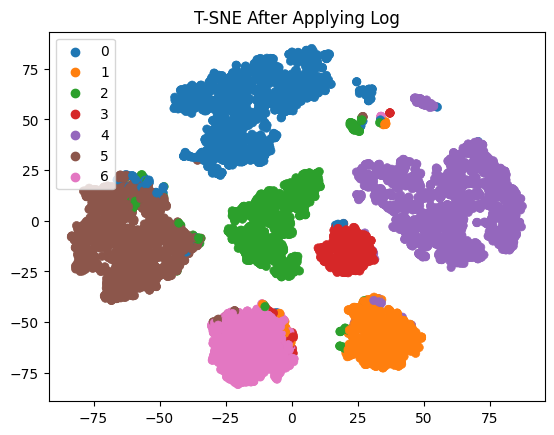

In [172]:
tsne = TSNE(n_components=2,perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(df_copy_2)

t_sne_1 = results[:,0]
t_sne_2 = results[:,1]

sns.scatterplot(x=t_sne_1, y=t_sne_2,hue = labels, palette="tab10", edgecolor = None)
plt.title('T-SNE After Applying Log')

## Applying PCA

### 1. Traditional PCA

In [173]:
pca = sklearn.decomposition.PCA(n_components=9)
pca_result = pca.fit_transform(df_copy_2)

In [174]:
kmeans = KMeans(n_clusters=7 ,init="k-means++")
kmeans = kmeans.fit(pca_result)
labels = kmeans.labels_

In [175]:
silhouette_score(pca_result, labels)

0.44825829745485835

Text(0.5, 1.0, 'T-SNE After Applying PCA (Log)')

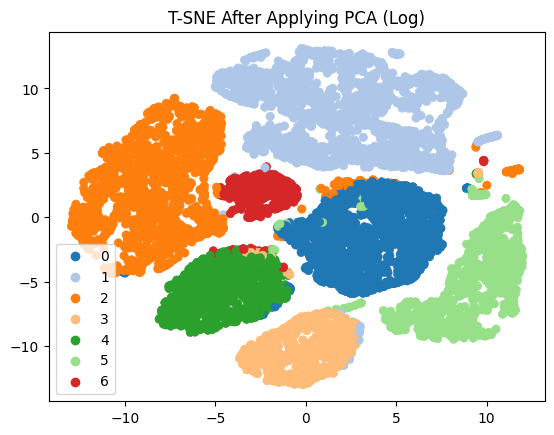

In [176]:
tsne = TSNE(n_components=2,perplexity=30, n_iter=300)
results = tsne.fit_transform(pca_result)
t_sne_1 = results[:,0]
t_sne_2 = results[:,1]
sns.scatterplot(x=t_sne_1, y=t_sne_2,hue = labels, palette="tab20",edgecolor = None)
    
plt.title('T-SNE After Applying PCA (Log)')

### 2. Kernel PCA

Kernel PCA can handle nonlinear relationships between the input features, allowing for more accurate dimensionality reduction and feature extraction compared to traditional linear PCA

In [180]:
kpca = KernelPCA(kernel='rbf', gamma=0.1, n_components = 9)  # RBF kernel
kpca_result = kpca.fit_transform(df_copy_2)

In [183]:
kmeans = KMeans(n_clusters=7 ,init="k-means++") #k-means++ improves the convergence of the algorithm
kmeans = kmeans.fit(kpca_result)

labels = kmeans.labels_

In [184]:
silhouette_score(kpca_result, labels)

0.4016069876213386

Text(0.5, 1.0, 'T-SNE After Applying KERNEL PCA (Log)')

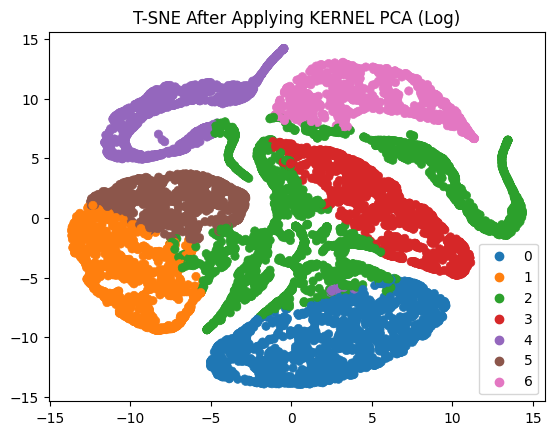

In [186]:
tsne = TSNE(n_components=2,perplexity=30, n_iter=300)
results = tsne.fit_transform(kpca_result)
t_sne_1 = results[:,0]
t_sne_2 = results[:,1]
sns.scatterplot(x=t_sne_1, y=t_sne_2,hue = labels, palette='tab10', edgecolor=None)
plt.title('T-SNE After Applying KERNEL PCA (Log)')


- After implementing log transformations, the clustering of groups has significantly improved.
- When Log transformations is used, traditional  PCA  resulted better performance than Kernel PCA .


________________________________

# 6. AgglomerativeClustering


Before we start the training process we need to specify 3 paramters:<br>
- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
  
- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
    
- Number of clusters


In [187]:
def compute_silhouette_score(data, n_clusters, linkage, metric):
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, affinity=metric)
    labels = clustering.fit_predict(data)
    silhouette= silhouette_score(data, labels)
    return silhouette

In [198]:
linkage_criteria = ['complete', 'average', 'single']
distance_functions = ['euclidean', 'cityblock']

best_num_clusters = {}
best_silhouette_scores = {}
for linkage in linkage_criteria:
    for metric in distance_functions:
        
        # Silhouette scores for different numbers of clusters
        silhouette_scores= []
        num_clusters_range= range(3, 11)
        for n_clusters in num_clusters_range:
            silhouette= compute_silhouette_score(df_copy_2, n_clusters, linkage, metric)
            silhouette_scores.append(silhouette)
        
        # Find the best number of clusters based on silhouette score
        best_num_clusters[(linkage, metric)] = np.array(silhouette_scores).argmax() + 3  # Add 3 since we start from 3

In [199]:
best_num_clusters

{('complete', 'euclidean'): 7,
 ('complete', 'cityblock'): 4,
 ('average', 'euclidean'): 7,
 ('average', 'cityblock'): 4,
 ('single', 'euclidean'): 3,
 ('single', 'cityblock'): 3}

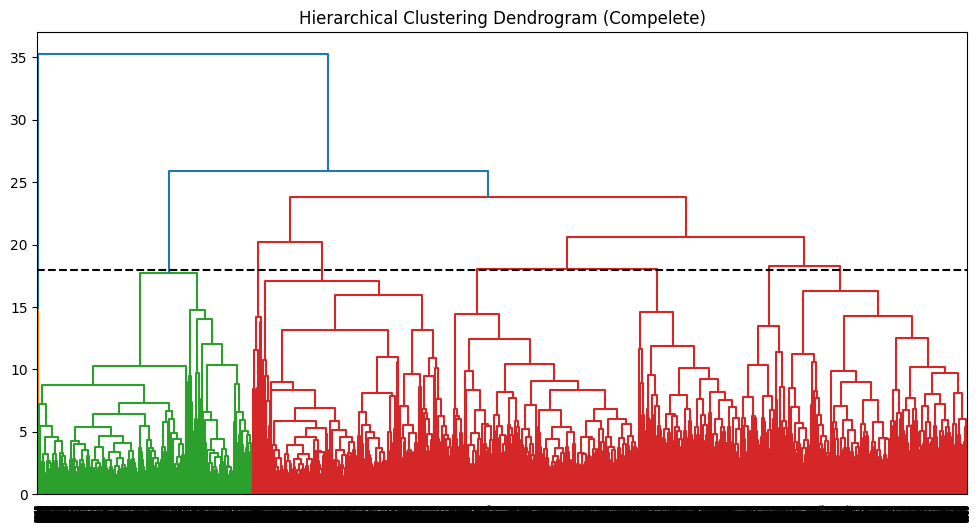

In [203]:
plt.figure(figsize=(12, 6))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_copy_2, method='complete',metric='euclidean')) #fill y with your dataframe
plt.axhline(y=18, color='k', linestyle='--')                                                                                    #and method with linkage criteria
                                                                                      #and metric with distance function
plt.title('Hierarchical Clustering Dendrogram (Compelete)')
plt.show()


**1 - Linkage Criteria:**

***Complete Linkage:***

- It creates more separated clusters.
- For 'euclidean' and 'cityblock', it gives higher cluster numbers (9 and 7),showing clear segments in spending or customer behavior.
- With 'mahalanobis',it gives fewer clusters (4),showing strong similarities between data points.

***Average Linkage:***

- The number of clusters changes with different metrics.
- 'euclidean' and 'cityblock' give medium cluster numbers (9 and 11),indicating various customer groups.
- 'mahalanobis' gives only 4 clusters, suggesting similar spending habits.
***Single Linkage:***

- It creates fewer clusters.
- The cluster numbers are the same , which is 4.


**2 - Distance Metrics:**

***Euclidean Distance:***

- It often results in more clusters, suggesting clear separations between data points.

***Cityblock Distance (manhattan):***

- It gives different cluster numbers,showing variety of values compared to euclidean distance.

***Mahalanobis Distance:***

- It always gives fewer clusters.
- It merges points close.

# 7. DBSCAN

- Since DBSCAN is less effective in High Dimensional Data, we may want to apply PCA first.
- Secondly , we need to choose the best hyperparameters (epsilon & min_samples)

In [228]:
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    n_labels = len(set(labels)) - (1 if -1 in labels else 0) 
    if n_labels <= 1:
        return -1  # Return a negative score if only one label is present
    else:
        return silhouette_score(X, labels)

In [227]:
pca = sklearn.decomposition.PCA(n_components=0.95)
pca_result = pca.fit_transform(df_copy_2)

In [255]:
# Define a grid of min_samples
param_grid = {'min_samples': [20,30,50,80,150,200,500]}

grid_search = RandomizedSearchCV(DBSCAN(), param_grid,scoring=silhouette_scorer,cv=5)
grid_search.fit(pca_result)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)

Best Parameters: {'min_samples': 20}


In [249]:
k = 20 # min_samples
knn = NearestNeighbors(n_neighbors=k+1)  # Add 1 to include the point itself
knn.fit(pca_result)
distances, indices = knn.kneighbors(pca_result)

In [250]:
# select last distances and sort ascendingly
N_distances = np.sort(distances[:, -1])

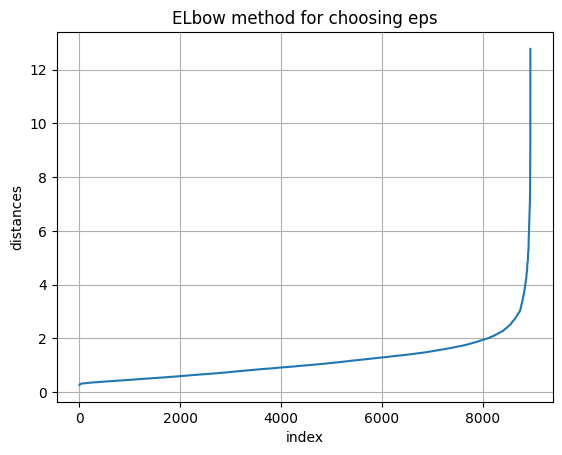

In [251]:
plt.plot(range(len(N_distances)),N_distances)
plt.xlabel('index')
plt.ylabel('distances')
plt.title('ELbow method for choosing eps')
plt.grid()

In [252]:
# Will take eps at 2
eps = 2 
print("Estimated eps:", eps)

Estimated eps: 2


In [253]:
dbscan = DBSCAN(eps, min_samples=20)
labels = dbscan.fit_predict(pca_result)
labels

array([0, 1, 2, ..., 0, 1, 6], dtype=int64)

Text(0.5, 1.0, 'T-SNE Using DBSCAN')

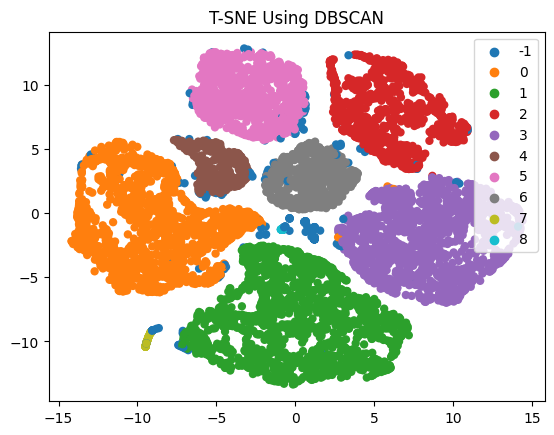

In [254]:
tsne = TSNE(n_components=2,n_iter=300)
results = tsne.fit_transform(pca_result)
t_sne_1 = results[:,0]
t_sne_2 = results[:,1]
sns.scatterplot(x=t_sne_1, y=t_sne_2,hue = labels, palette="tab10",edgecolor="none")
    
plt.title('T-SNE Using DBSCAN')

- The estimated number of clusters is 7, and there are some noise (represented in two clusters) scattered around.

# Gaussian Mixture : EM Model

## 1- Clustering

In [256]:
n_components = 7
em = GaussianMixture(n_components=n_components, covariance_type='full',n_init=4) # to prevent local minima
em.fit(df_copy_2)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=7, n_init=4, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [257]:
cluster_means = em.means_
cluster_covariances = em.covariances_
cluster_weights = em.weights_
# print('cluster means:',cluster_means)
# print('cluster covariances:',cluster_covariances)
# print('cluster weights:',cluster_weights)

In [258]:
labels = em.predict(df_copy_2)
print("Cluster assignments:", labels)

Cluster assignments: [0 3 4 ... 0 3 1]


In [259]:
silhouette_score(pca_result,labels)

0.4106772409211221

Text(0.5, 1.0, 'T-SNE After Applying EM')

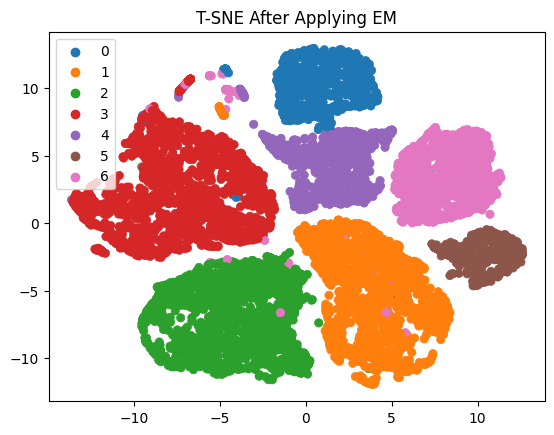

In [266]:
# Initialize t-SNE with early exaggeration
tsne = TSNE(n_components=2,early_exaggeration=12,n_iter=300) 
results = tsne.fit_transform(df_copy_2)
t_sne_1 = results[:,0]
t_sne_2 = results[:,1]
sns.scatterplot(x=t_sne_1, y=t_sne_2,hue = labels, palette="tab10", edgecolor= None)
    
plt.title('T-SNE After Applying EM')

### Applying PCA

In [267]:
pca = sklearn.decomposition.PCA(n_components=0.95)
pca_result = pca.fit_transform(df_copy_2)

In [268]:
n_components = 7
em = GaussianMixture(n_components=n_components,n_init=4) # to prevent local minima
em.fit(pca_result)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=7, n_init=4, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [269]:
labels = em.predict(pca_result)
print("Cluster assignments:", labels)

Cluster assignments: [3 1 4 ... 3 1 2]


In [270]:
silhouette_score(pca_result,labels) # better without using pca

0.4652490966319354

Text(0.5, 1.0, 'T-SNE After Applying EM')

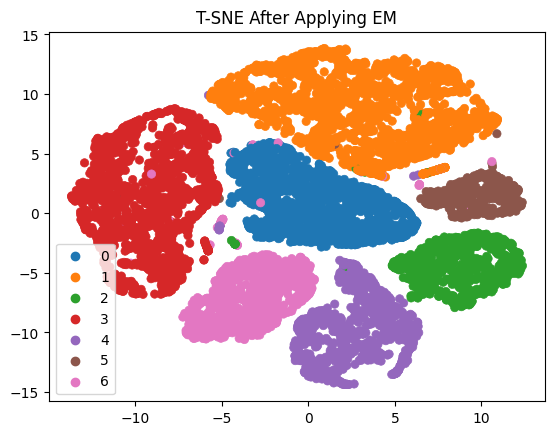

In [271]:
# Initialize t-SNE with early exaggeration
tsne = TSNE(n_components=2,early_exaggeration=12, n_iter=300)
results = tsne.fit_transform(pca_result)
t_sne_1 = results[:,0]
t_sne_2 = results[:,1]
sns.scatterplot(x=t_sne_1, y=t_sne_2,hue = labels, palette="tab10", edgecolor= None)
    
plt.title('T-SNE After Applying EM')

## 2 - Anomaly Detection

In [283]:
n_components = 7 
em = GaussianMixture(n_components=n_components, n_init=4)
em.fit(df_copy_2)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=7, n_init=4, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [284]:
n_components = 7
em = GaussianMixture(n_components=n_components,n_init=4) # to prevent local minima
em.fit(df_copy_2)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=7, n_init=4, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [285]:
labels = em.predict(df_copy_2)
print("Cluster assignments:", labels)

Cluster assignments: [3 4 1 ... 3 4 2]


In [304]:
# The score_samples method of the em computes the log-likelihood of each data point under the fitted GMM
probs = em.score_samples(df_copy_2)
threshold = np.percentile(probs,1)    
anomalies = df_copy_2[probs < threshold]

In [308]:
combined_data = pd.concat([df_copy_2, anomalies])

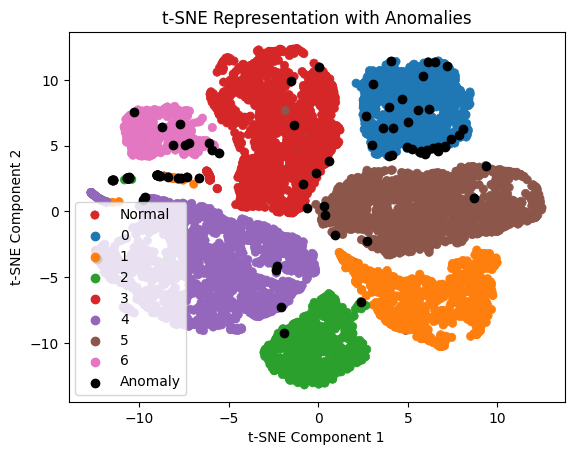

In [309]:
tsne = TSNE(n_components=2,early_exaggeration=12,n_iter=300) 

results = tsne.fit_transform(combined_data)

t_sne_1 = results[:len(df_copy_2), 0]
t_sne_2 = results[:len(df_copy_2), 1]

anomaly_1 = results[len(df_copy_2):, 0]
anomaly_2 = results[len(df_copy_2):, 1]


sns.scatterplot(x=t_sne_1, y=t_sne_2, hue=labels, palette="tab10", label='Normal', edgecolor=None)
plt.scatter(x=anomaly_1, y=anomaly_2, color='black', label='Anomaly')

plt.title('t-SNE Representation with Anomalies')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

# Clusters Analysis

- Apparently the optimal number of clusters is 7, thus we can categorize the credit card customer segments into 7 different groups.

In [312]:
final_df = df_copy_2.copy()

In [313]:
kmeans = KMeans(n_clusters=7 ,init="k-means++")
kmeans = kmeans.fit(final_df)
labels = kmeans.labels_

In [314]:
final_df['CLUSTER'] = labels

In [315]:
for col in final_df[cat_2_cols + cat_3_cols]:
    final_df[col] = np.exp(final_df[col].apply(change_zero))
    
final_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.400000,2.718282,95.400000,2.718282,0.166667,0.000000,0.083333,0.000000,2.718282,2.000000,1000.0,201.802084,139.509787,0.000000,12.0,0
1,3202.467416,0.909091,2.718282,2.718282,2.718282,6442.945483,0.000000,0.000000,0.000000,0.250000,4.000000,2.718282,7000.0,4103.032597,1072.340217,0.222222,12.0,1
2,2495.148862,1.000000,773.170000,773.170000,2.718282,2.718282,1.000000,1.000000,0.000000,0.000000,2.718282,12.000000,7500.0,622.066742,627.284787,0.000000,12.0,2
3,1666.670542,0.636364,1499.000000,1499.000000,2.718282,205.788017,0.083333,0.083333,0.000000,0.083333,2.718282,2.718282,7500.0,2.718282,2.718282,0.000000,12.0,5
4,817.714335,1.000000,16.000000,16.000000,2.718282,2.718282,0.083333,0.083333,0.000000,0.000000,2.718282,2.718282,1200.0,678.334763,244.791237,0.000000,12.0,2


In [316]:
final_df.groupby('CLUSTER').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CLUSTER,,,,,,,,,,,,,,,,,
0,376.289124,0.782495,516.345560,5.227280,514.689323,3.167918,0.700073,0.005147,0.664028,0.000443,2.717518,11.646381,3127.370220,728.903603,602.349331,0.303918,11.501861
1,2144.983750,0.882654,2.844497,2.802424,2.799620,1988.693590,0.002536,0.001493,0.001084,0.271425,6.642121,2.726667,4024.595913,1658.275840,963.293506,0.044110,11.325145
2,751.806050,0.770174,862.231645,860.913643,4.015986,3.970557,0.356399,0.352020,0.005501,0.001883,2.717012,8.223837,4398.417866,1175.533457,459.106250,0.137481,11.555261
3,2894.243047,0.970941,2003.925521,1206.770792,797.177875,2152.634360,0.791122,0.404399,0.640712,0.296260,8.213977,31.272917,5904.178241,3126.217890,1271.321841,0.069410,11.622917
4,1285.266706,0.947328,2617.480972,1594.353105,1023.162360,2.980487,0.832657,0.478944,0.666425,0.000654,2.718282,36.444176,5838.582872,2399.416972,689.714757,0.258612,11.831020
5,2403.439580,0.933234,672.713694,672.537143,3.246775,2083.060781,0.281898,0.279462,0.003669,0.300532,7.367479,6.882748,4653.570844,1943.742328,1018.364737,0.052821,11.314028
6,2597.341047,0.960029,530.501474,3.776283,529.961474,2018.148156,0.652188,0.004503,0.602576,0.261859,6.610142,12.241030,4390.384615,1884.235721,1436.142564,0.044482,11.350427


In [317]:
cluster_dataframes = {'cluster_df_{}'.format(i): final_df[final_df["CLUSTER"] == cluster] for i, cluster in enumerate(np.unique(labels))}

In [318]:
cluster_dataframes['cluster_df_0'].head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,2.718282,95.40,2.718282,0.166667,0.0,0.083333,0.0,2.718282,2.0,1000.0,201.802084,139.509787,0.00,12.0,0
5,1809.828751,1.000000,1333.28,2.718282,1333.28,2.718282,0.666667,0.0,0.583333,0.0,2.718282,8.0,1800.0,1400.057770,2407.246035,0.00,12.0,0
7,1823.652743,1.000000,436.20,2.718282,436.20,2.718282,1.000000,0.0,1.000000,0.0,2.718282,12.0,2300.0,679.065082,532.033990,0.00,12.0,0
10,1293.124939,1.000000,920.12,2.718282,920.12,2.718282,1.000000,0.0,1.000000,0.0,2.718282,12.0,1200.0,1083.301007,2172.697765,0.00,12.0,0
17,41.089489,0.454545,519.00,2.718282,519.00,2.718282,0.416667,0.0,0.333333,0.0,2.718282,8.0,2500.0,254.590662,73.203221,0.25,12.0,0


In [319]:
cluster_dataframes['cluster_df_1'].head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
1,3202.467416,0.909091,2.718282,2.718282,2.718282,6442.945483,0.0,0.0,0.0,0.250000,4.000000,2.718282,7000.0,4103.032597,1072.340217,0.222222,12.0,1
14,2772.772734,1.000000,2.718282,2.718282,2.718282,346.811390,0.0,0.0,0.0,0.083333,2.718282,2.718282,3000.0,805.647974,989.962866,0.000000,12.0,1
16,2072.074354,0.875000,2.718282,2.718282,2.718282,2784.274703,0.0,0.0,0.0,0.250000,3.000000,2.718282,3000.0,391.974562,376.579631,0.000000,8.0,1
24,5368.571219,1.000000,2.718282,2.718282,2.718282,798.949863,0.0,0.0,0.0,0.363636,4.000000,2.718282,6000.0,1422.726707,1657.002877,0.000000,11.0,1
35,1656.350781,1.000000,2.718282,2.718282,2.718282,99.264367,0.0,0.0,0.0,0.083333,2.718282,2.718282,1800.0,351.500199,634.569311,0.000000,12.0,1


In [320]:
cluster_dataframes['cluster_df_2'].head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
2,2495.148862,1.000000,773.17,773.17,2.718282,2.718282,1.000000,1.000000,0.0,0.0,2.718282,12.000000,7500.0,622.066742,627.284787,0.0,12.0,2
4,817.714335,1.000000,16.00,16.00,2.718282,2.718282,0.083333,0.083333,0.0,0.0,2.718282,2.718282,1200.0,678.334763,244.791237,0.0,12.0,2
9,152.225975,0.545455,1281.60,1281.60,2.718282,2.718282,0.166667,0.166667,0.0,0.0,2.718282,3.000000,11000.0,1164.770591,100.302262,0.0,12.0,2
11,630.794744,0.818182,1492.18,1492.18,2.718282,2.718282,0.250000,0.250000,0.0,0.0,2.718282,6.000000,2000.0,705.618627,155.549069,0.0,12.0,2
33,125.660453,1.000000,636.79,636.79,2.718282,2.718282,0.916667,0.916667,0.0,0.0,2.718282,11.000000,1200.0,423.449696,196.301885,0.3,12.0,2


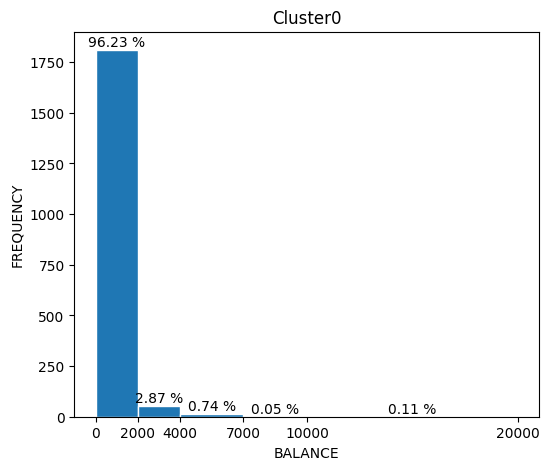

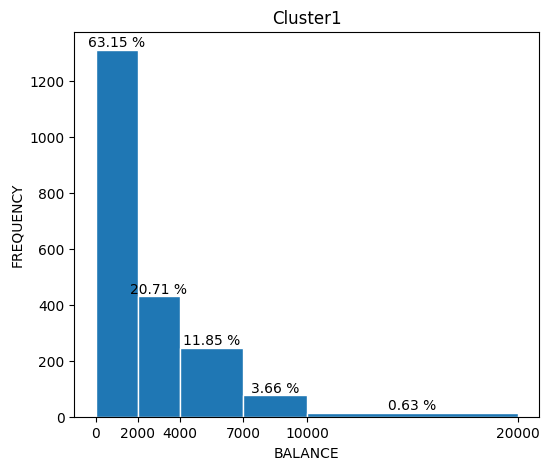

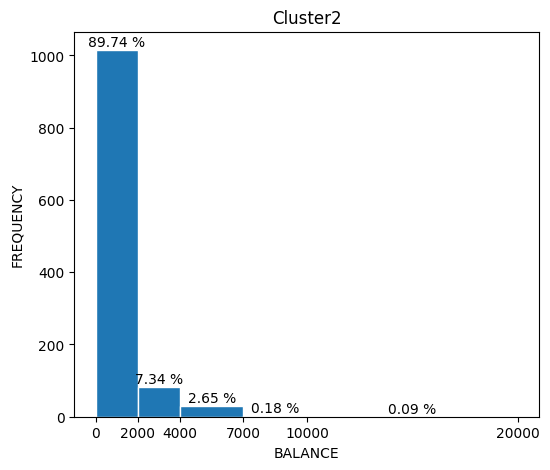

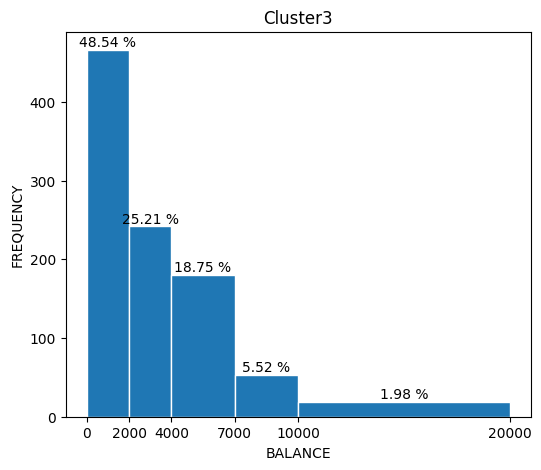

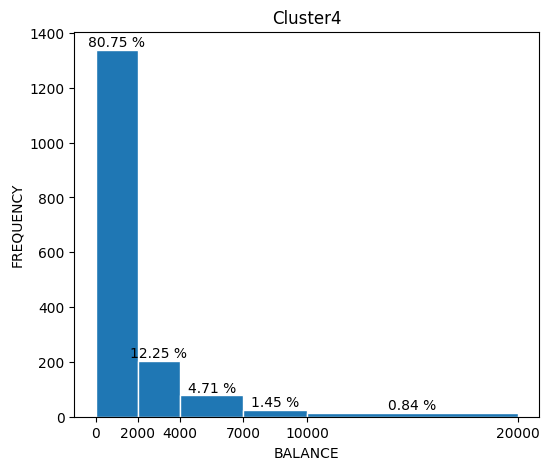

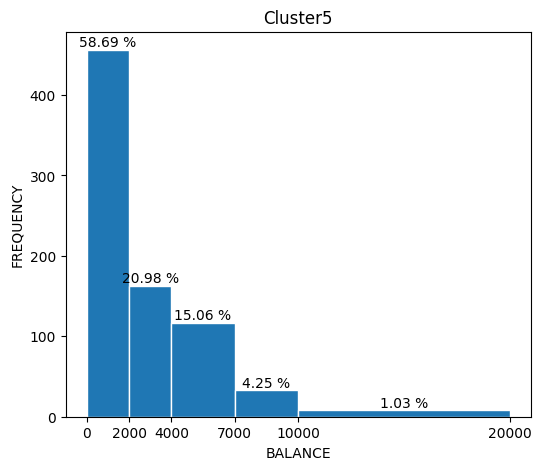

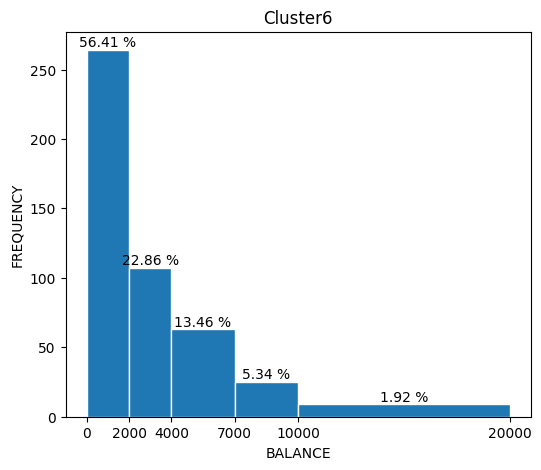

In [321]:
i=0
for cluster in cluster_dataframes:
    plot_hist(cluster_dataframes[cluster],'BALANCE',[0,2000,4000,7000,10000,20000],(6, 5))
    plt.title(f'Cluster{i}')
    i+=1

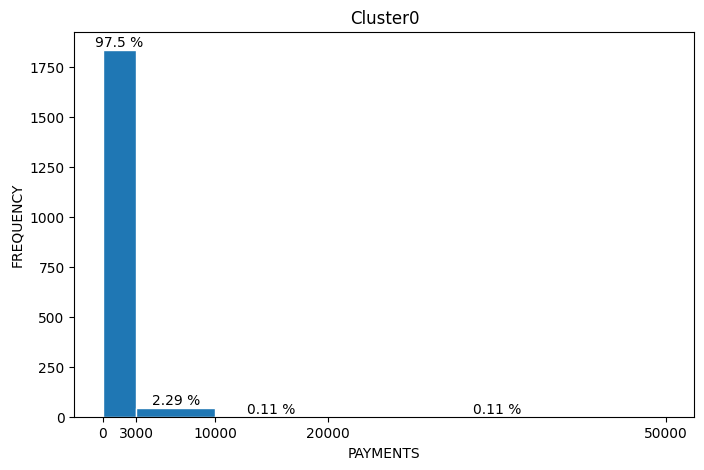

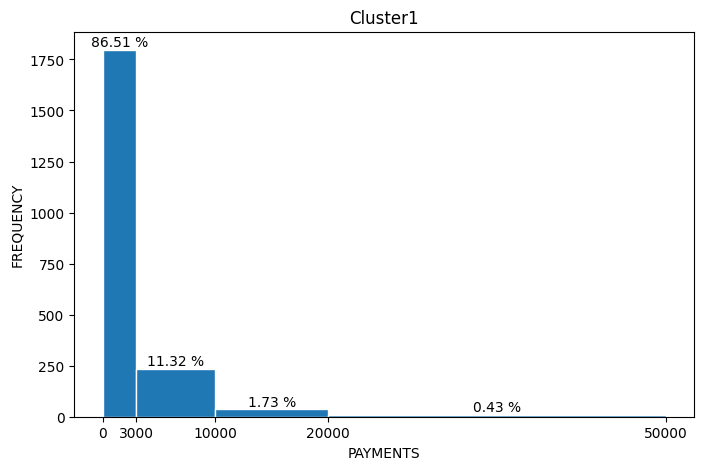

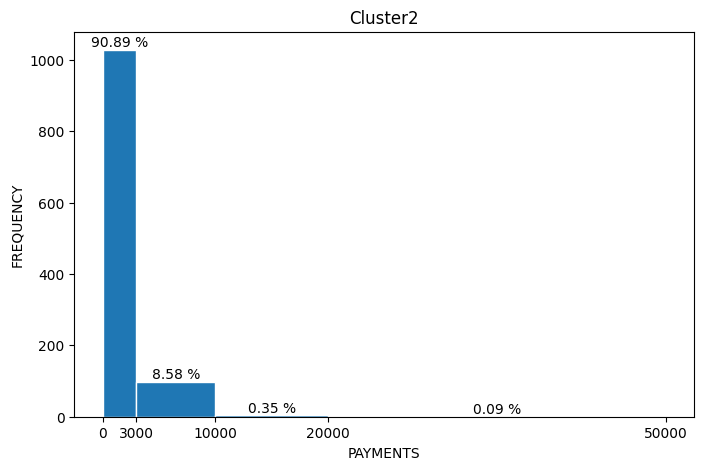

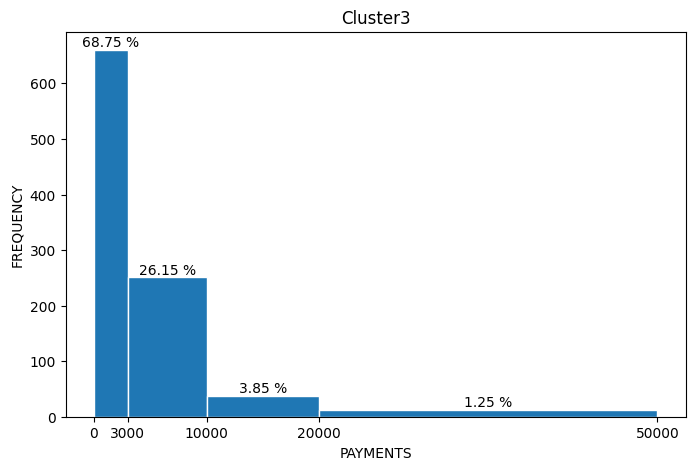

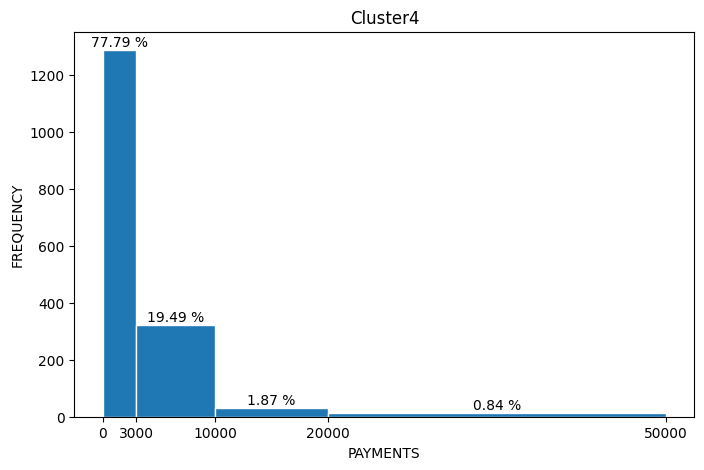

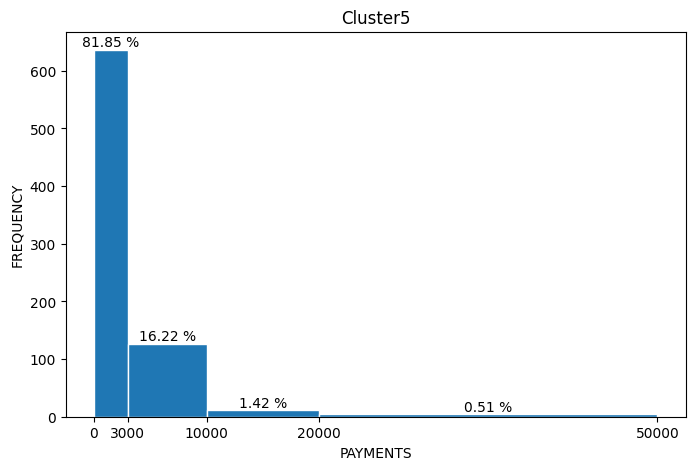

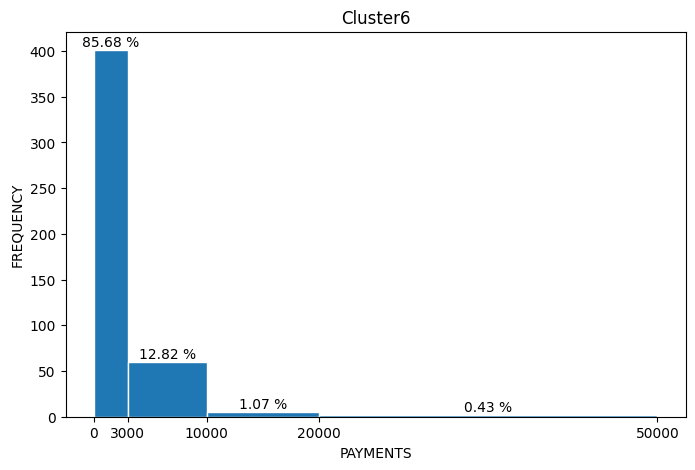

In [322]:
i=0
for cluster in cluster_dataframes:
    plot_hist(cluster_dataframes[cluster],'PAYMENTS',[0,3000,10000,20000,50000],(8, 5))
    plt.title(f'Cluster{i}')
    i+=1

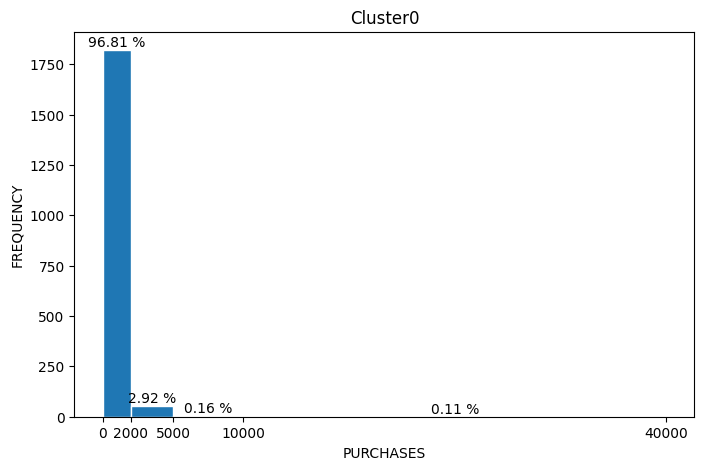

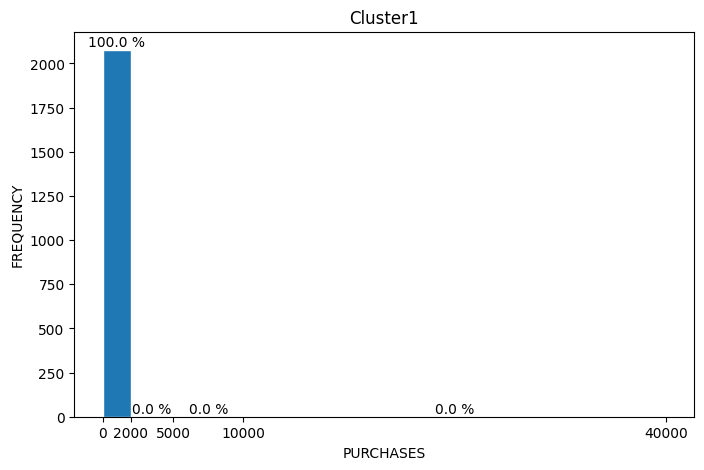

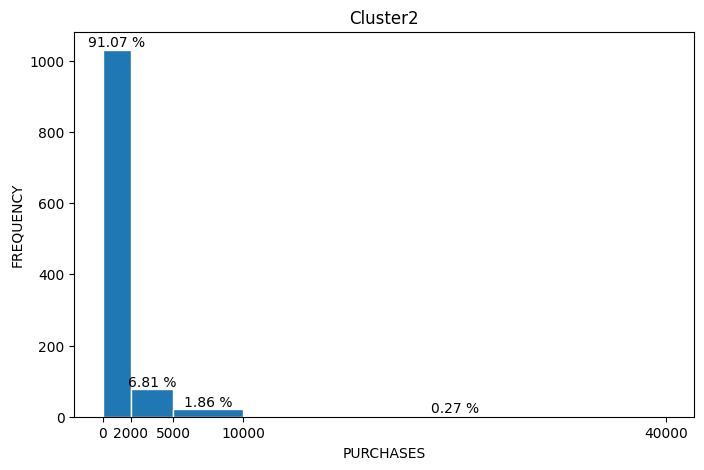

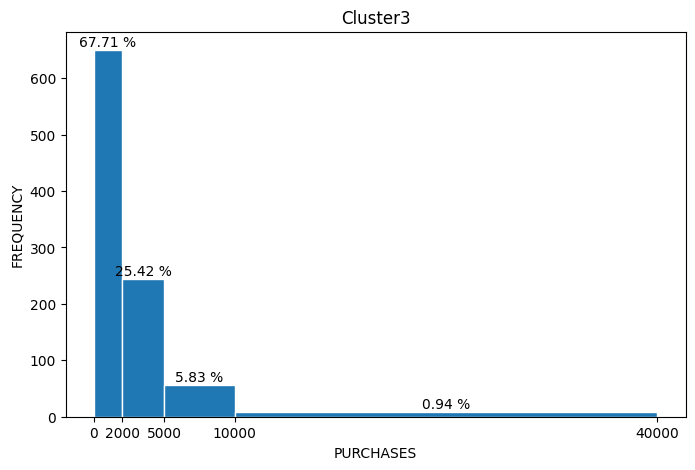

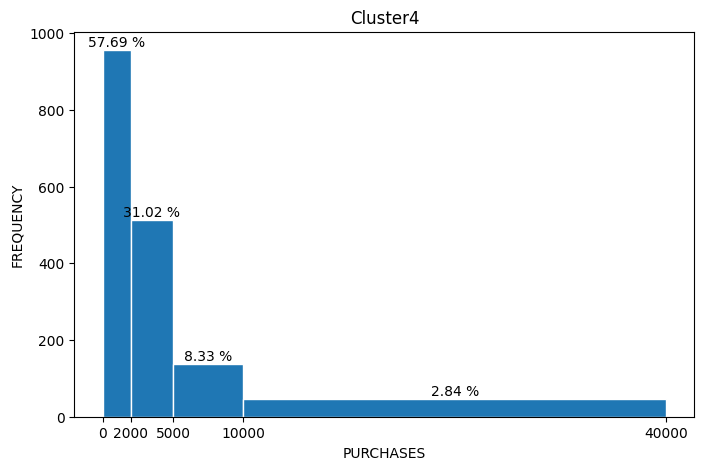

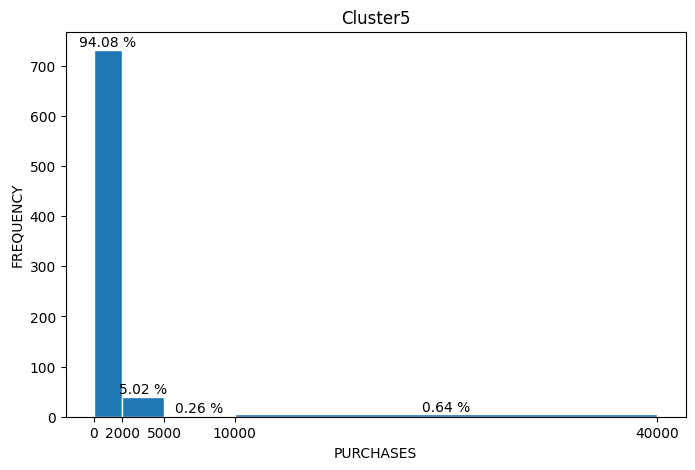

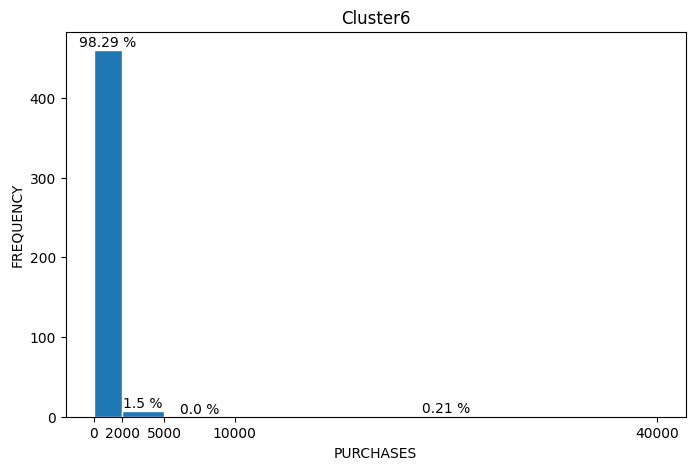

In [323]:
i=0
for cluster in cluster_dataframes:
    plot_hist(cluster_dataframes[cluster],'PURCHASES',[0,2000,5000,10000,40000],(8, 5))
    plt.title(f'Cluster{i}')
    i+=1

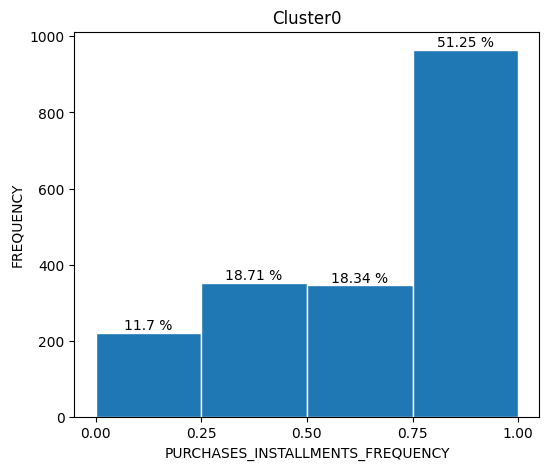

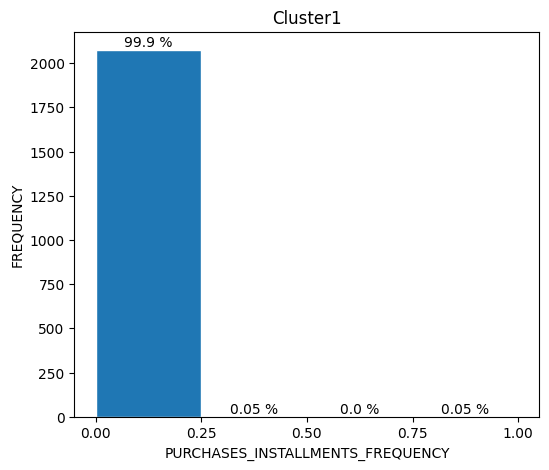

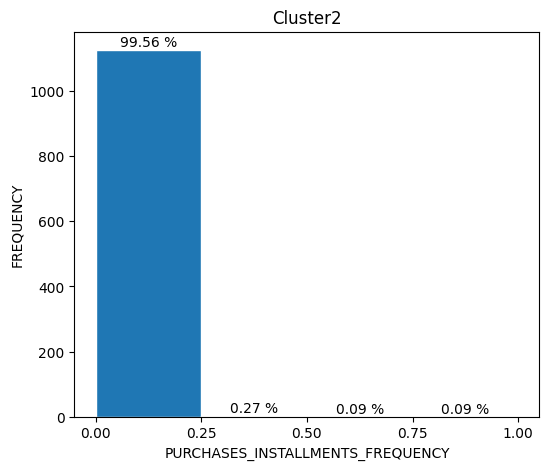

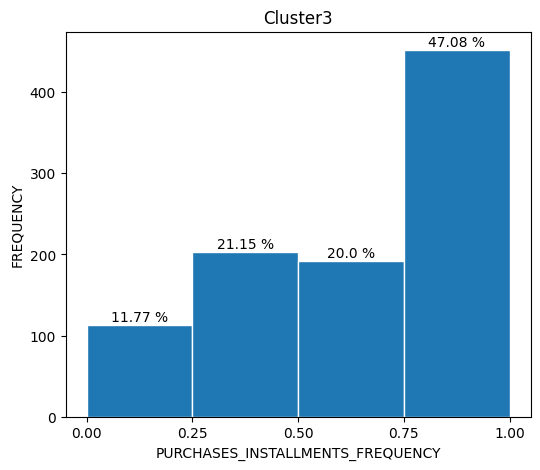

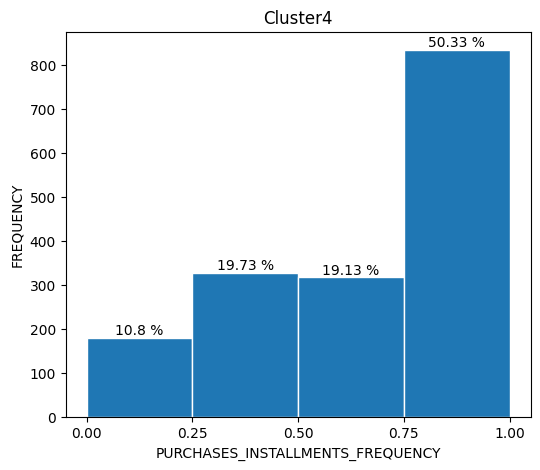

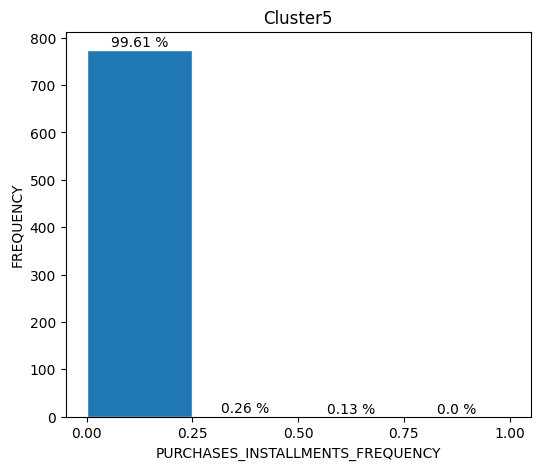

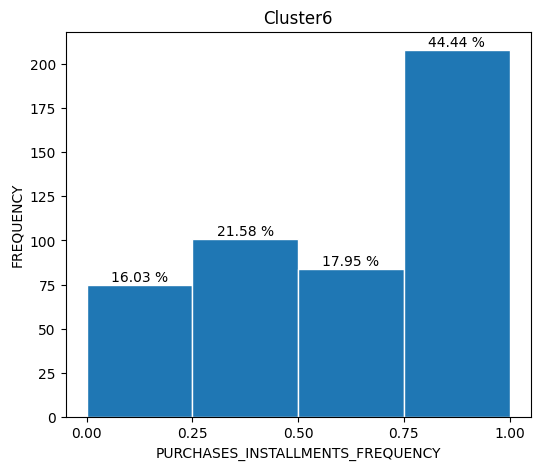

In [324]:
i=0
for cluster in cluster_dataframes:
    plot_hist(cluster_dataframes[cluster],'PURCHASES_INSTALLMENTS_FREQUENCY',[0,0.25,0.5,0.75,1],(6, 5))
    plt.title(f'Cluster{i}')
    i+=1

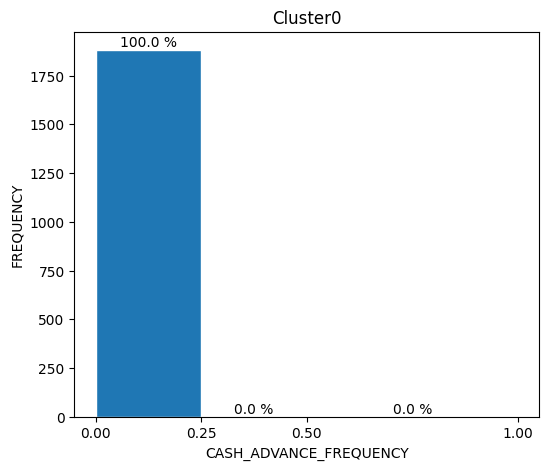

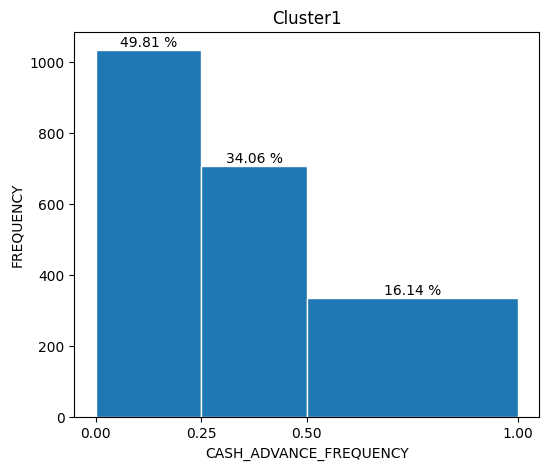

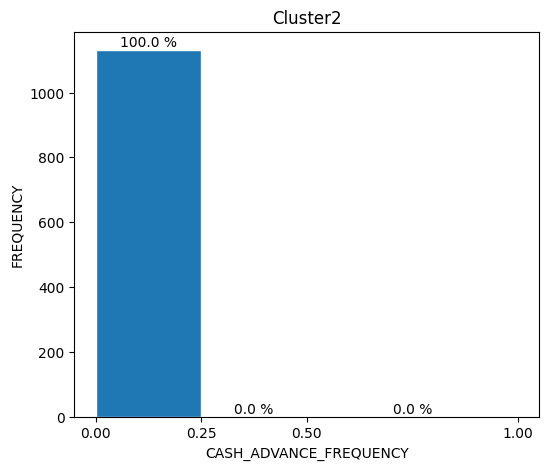

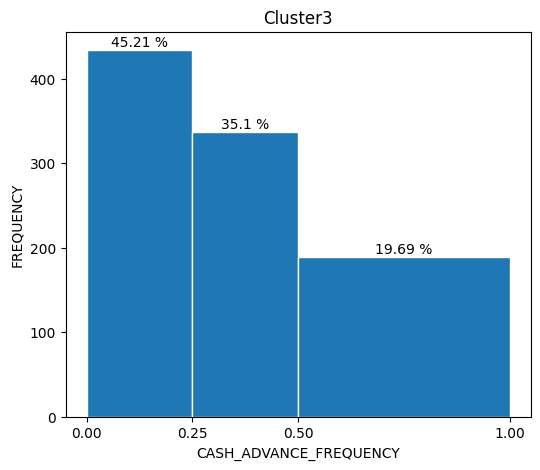

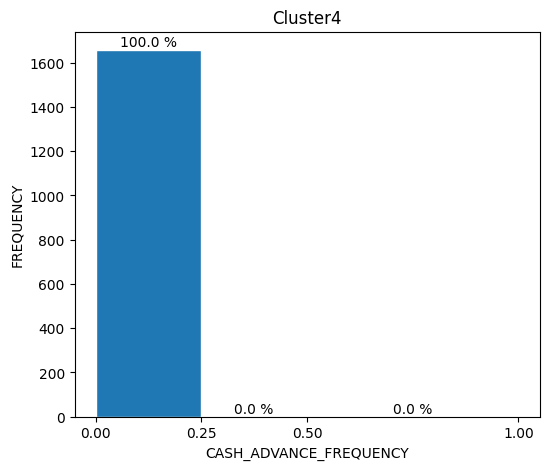

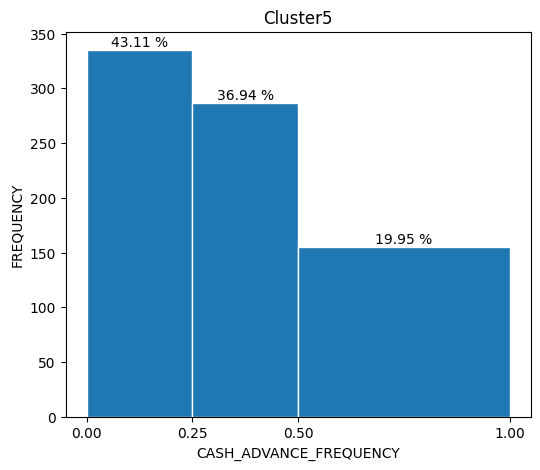

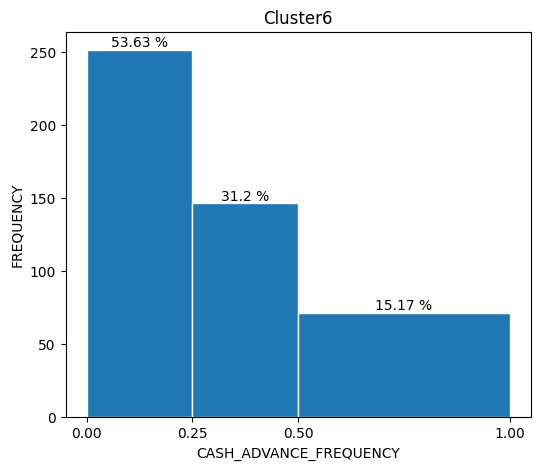

In [325]:
i=0
for cluster in cluster_dataframes:
    plot_hist(cluster_dataframes[cluster],'CASH_ADVANCE_FREQUENCY',[0,0.25,0.5,1],(6, 5))
    plt.title(f'Cluster{i}')
    i+=1

#### Insights:

BALANCE: different clusters may have different average account balances, cluster 4 and cluster 6 have customers with high balances.

PURCHASES: There are similarities in the purchase amounts across clusters, yet again, cluster 4 and cluster 6 have samples with high purchases amounts.

PURCHASES_INSTALLMENTS_FREQUENCY: installment purchases are infrequently made in cluster 0,2 and 5, yet, are frequently made in the rest clusters with similar frequency.

CASH_ADVANCE: some clusters have customers who use cash advances more frequently or in larger amounts, such as cluster 4 with (14.75%) , cluster 6 with (19.41%) and cluster 2 with (16.24%).

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 